In [1]:
# Import the required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

from lightgbm import LGBMClassifier

# To display all the columns
pd.options.display.max_columns = None

# To display all the rows
pd.options.display.max_rows = None

# To map Empty Strings or numpy.inf as Na Values
pd.options.mode.use_inf_as_na = True

pd.options.display.expand_frame_repr =  False

%matplotlib inline

# Set Style
sns.set(style = "whitegrid")

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
telecom_data = pd.read_csv('telecom_churn_data.csv')

telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4.0,

In [3]:
telecom_data.shape

(3972, 226)

In [4]:
# Check the total missing values in each column.
print("Total NULL Values in each columns")
print("*********************************")
print(telecom_data.isnull().sum())

Total NULL Values in each columns
*********************************
mobile_number                  0
circle_id                      0
loc_og_t2o_mou                33
std_og_t2o_mou                33
loc_ic_t2o_mou                33
last_date_of_month_6           0
last_date_of_month_7          30
last_date_of_month_8          48
last_date_of_month_9          69
arpu_6                         0
arpu_7                         0
arpu_8                         0
arpu_9                         0
onnet_mou_6                  130
onnet_mou_7                  149
onnet_mou_8                  217
onnet_mou_9                  313
offnet_mou_6                 130
offnet_mou_7                 149
offnet_mou_8                 217
offnet_mou_9                 313
roam_ic_mou_6                130
roam_ic_mou_7                149
roam_ic_mou_8                217
roam_ic_mou_9                313
roam_og_mou_6                130
roam_og_mou_7                149
roam_og_mou_8                217
roam_og_

In [5]:
# Lets check the percentage of missing values column-wise

(telecom_data.isnull().sum()/ len(telecom_data)) * 100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               0.830816
std_og_t2o_mou               0.830816
loc_ic_t2o_mou               0.830816
last_date_of_month_6         0.000000
last_date_of_month_7         0.755287
last_date_of_month_8         1.208459
last_date_of_month_9         1.737160
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.272910
onnet_mou_7                  3.751259
onnet_mou_8                  5.463243
onnet_mou_9                  7.880161
offnet_mou_6                 3.272910
offnet_mou_7                 3.751259
offnet_mou_8                 5.463243
offnet_mou_9                 7.880161
roam_ic_mou_6                3.272910
roam_ic_mou_7                3.751259
roam_ic_mou_8                5.463243
roam_ic_mou_9                7.880161
roam_og_mou_6                3.272910
roam_og_mou_

In [6]:
total_rech_data_6_index = telecom_data['total_rech_data_6'].isnull()
date_of_last_rech_data_6_index = telecom_data['date_of_last_rech_data_6'].isnull()

if total_rech_data_6_index.equals(date_of_last_rech_data_6_index):
    print('The indexes for NULL values for month 6 are equal')


The indexes for NULL values for month 6 are equal


In [7]:
telecom_data['total_rech_data_6'].fillna(0, inplace=True)
telecom_data['av_rech_amt_data_6'].fillna(0, inplace=True)

We will follow the same logic for **'total_rech_data_7', av_rech_amt_data_7,  'total_rech_data_8' & 'av_rech_amt_data_8'** columns as well.

In [8]:
total_rech_data_7_index = telecom_data['total_rech_data_7'].isnull()
date_of_last_rech_data_7_index = telecom_data['date_of_last_rech_data_7'].isnull()

if total_rech_data_7_index.equals(date_of_last_rech_data_7_index):
    print('The indexes for NULL values for month 7 are equal')

The indexes for NULL values for month 7 are equal


In [9]:
total_rech_data_8_index = telecom_data['total_rech_data_8'].isnull()
date_of_last_rech_data_8_index = telecom_data['date_of_last_rech_data_8'].isnull()

if total_rech_data_8_index.equals(date_of_last_rech_data_8_index):
    print('The indexes for NULL values for month 8 are equal')

The indexes for NULL values for month 8 are equal


In [10]:
# Month 7
telecom_data['total_rech_data_7'].fillna(0, inplace=True)
telecom_data['av_rech_amt_data_7'].fillna(0, inplace=True)

# Month 8
telecom_data['total_rech_data_8'].fillna(0, inplace=True)
telecom_data['av_rech_amt_data_8'].fillna(0, inplace=True)

Lets check for the missing values %-age again

In [11]:
(telecom_data.isnull().sum(axis = 0)/ len(telecom_data)) * 100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               0.830816
std_og_t2o_mou               0.830816
loc_ic_t2o_mou               0.830816
last_date_of_month_6         0.000000
last_date_of_month_7         0.755287
last_date_of_month_8         1.208459
last_date_of_month_9         1.737160
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.272910
onnet_mou_7                  3.751259
onnet_mou_8                  5.463243
onnet_mou_9                  7.880161
offnet_mou_6                 3.272910
offnet_mou_7                 3.751259
offnet_mou_8                 5.463243
offnet_mou_9                 7.880161
roam_ic_mou_6                3.272910
roam_ic_mou_7                3.751259
roam_ic_mou_8                5.463243
roam_ic_mou_9                7.880161
roam_og_mou_6                3.272910
roam_og_mou_

In [12]:
# Also lets check how many columns have more than 70% data missing

cols_with_atleast_70_percent_missing_data = ((telecom_data.isnull().sum()/ len(telecom_data)) * 100) >= 70
cols_with_atleast_70_percent_missing_data.sum()

34

So there are 34 columns where 70% data is missing. Now this 70% data is based out of the complete data which contains about 1 lac observations. But our objective is to find the churn rate for only **high valued** customers. It has been given that after filtering high-valued customers we would be left with about 29.9k rows. So dropping the variables now might not be a good idea. 

# Data Preparation


In [13]:
telecom_data['total_data_rech_amt_6'] = telecom_data['total_rech_data_6'] * telecom_data['av_rech_amt_data_6']
telecom_data['total_data_rech_amt_7'] = telecom_data['total_rech_data_7'] * telecom_data['av_rech_amt_data_7']
telecom_data['total_data_rech_amt_8'] = telecom_data['total_rech_data_8'] * telecom_data['av_rech_amt_data_8']
telecom_data['total_data_rech_amt_9'] = telecom_data['total_rech_data_9'] * telecom_data['av_rech_amt_data_9']

## Filtering high-value customers

In [14]:
# Lets compute the average recharge amount for the month 6 & 7. This total amount is equal to the sum of talk time recharge 
# and data recharge amounts for the respective months.

avg_recharge_amount_month_6_7 = telecom_data[['total_data_rech_amt_6','total_data_rech_amt_7','total_rech_amt_6',
                                             'total_rech_amt_7']].mean(axis = 1)

amount_70th_percentile = np.percentile(avg_recharge_amount_month_6_7, 70)

print("70th percentile of the average recharge amount in the first two months is - ", amount_70th_percentile)

70th percentile of the average recharge amount in the first two months is -  244.5999999999999


Now filtering out the values we get -

In [15]:
# Filtering the high values

telecom_data = telecom_data[avg_recharge_amount_month_6_7 >= amount_70th_percentile]

In [16]:
telecom_data.shape

(1192, 230)

In [17]:
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,

So after filtering out the high-value customers we are left with 30027 observations. The shape of the telecom dataset is now
(30027, 230)

In [18]:
# Reset the dataframe indexes

telecom_data = telecom_data.reset_index(drop=True)
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,

# Rename Columns

In [19]:
# Rename month named vbc columns to format 6,7,8 and 9

telecom_data.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                               'jul_vbc_3g':'vbc_3g_7',
                               'aug_vbc_3g':'vbc_3g_8',
                               'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

In [20]:
churn_parameters_data = telecom_data[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']]
churn_parameters_data.head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00
2,34.91,142.18,0.00,0.00
3,252.61,1031.53,0.00,0.00
4,127.48,127.63,13.93,314.74


So any customer who does not use any of the facility (calls or mobile data) during the 9th month, will have the row sum for the attributes equal to zero. This customer can be tagged as **Churn (1)** else the customer will be tagged as **Not Churn (0)**.

In [21]:
telecom_data['churn'] = telecom_data.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) & 
                                                          (x.total_og_mou_9 == 0) and 
                                                          (x.vol_2g_mb_9 == 0) and 
                                                          (x.vol_3g_mb_9 == 0)) else 0, axis=1)

In [22]:
telecom_data['churn'].head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

In [23]:
# We will try to get all the columns in the 'telecom_data' dataset where the column have '_9' in the name.

cols_with__9 = [col for col in telecom_data.columns if '_9' in col]
cols_with__9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

We need to drop the above list of last month columns entirely.

In [24]:
print("Total number of columns to be dropped at this stage is - ", len(cols_with__9))

Total number of columns to be dropped at this stage is -  56


In [25]:
telecom_data.drop(cols_with__9, axis=1, inplace = True)

In [26]:
telecom_data.shape

(1192, 175)



# Data Cleaning & Missing Values Treatment

In [27]:
(telecom_data.isnull().sum(axis = 0)/ len(telecom_data)) * 100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               0.251678
std_og_t2o_mou               0.251678
loc_ic_t2o_mou               0.251678
last_date_of_month_6         0.000000
last_date_of_month_7         0.083893
last_date_of_month_8         0.755034
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  1.510067
onnet_mou_7                  1.845638
onnet_mou_8                  3.775168
offnet_mou_6                 1.510067
offnet_mou_7                 1.845638
offnet_mou_8                 3.775168
roam_ic_mou_6                1.510067
roam_ic_mou_7                1.845638
roam_ic_mou_8                3.775168
roam_og_mou_6                1.510067
roam_og_mou_7                1.845638
roam_og_mou_8                3.775168
loc_og_t2t_mou_6             1.510067
loc_og_t2t_mou_7             1.845638
loc_og_t2t_mou_8             3.775168
loc_og_t2m_m

In [28]:
# Also lets check how many columns have more than 40% data missing.

total_cols_with_atleast_40_percent_missing_data = ((telecom_data.isnull().sum()/ len(telecom_data)) * 100) >= 40
total_cols_with_atleast_40_percent_missing_data.sum()

24

In [29]:
# Get the column/feature names which have more than 40% missing data.

cols_names_with_40_percent_missing_value = total_cols_with_atleast_40_percent_missing_data[
    total_cols_with_atleast_40_percent_missing_data > 0.40].index

cols_names_with_40_percent_missing_value

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'],
      dtype='object')

In [30]:
telecom_data.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis=1, inplace = True)

In [31]:
print("Column info for max_rech_data_6")
print("-------------------------------")
print(telecom_data.max_rech_data_6.describe())
print('-------------------------------------')
print("Total NULL values for max_rech_data_6 columns is - ", telecom_data.max_rech_data_6.isnull().sum())

Column info for max_rech_data_6
-------------------------------
count    672.000000
mean     134.101190
std      104.277338
min        1.000000
25%       25.000000
50%      152.000000
75%      198.000000
max      655.000000
Name: max_rech_data_6, dtype: float64
-------------------------------------
Total NULL values for max_rech_data_6 columns is -  520


In [32]:
print("Column info for max_rech_data_7")
print("-------------------------------")
print(telecom_data.max_rech_data_7.describe())
print('-------------------------------------')
print("Total NULL values for max_rech_data_7 columns is - ", telecom_data.max_rech_data_7.isnull().sum())

Column info for max_rech_data_7
-------------------------------
count     706.000000
mean      136.205382
std       110.964790
min         8.000000
25%        25.000000
50%       153.000000
75%       198.000000
max      1255.000000
Name: max_rech_data_7, dtype: float64
-------------------------------------
Total NULL values for max_rech_data_7 columns is -  486


In [33]:
print("Column info for max_rech_data_8")
print("-------------------------------")
print(telecom_data.max_rech_data_8.describe())
print('-------------------------------------')
print("Total NULL values for max_rech_data_8 columns is - ", telecom_data.max_rech_data_8.isnull().sum())

Column info for max_rech_data_8
-------------------------------
count    668.000000
mean     133.696108
std      108.522249
min        8.000000
25%       25.000000
50%      152.000000
75%      198.000000
max      655.000000
Name: max_rech_data_8, dtype: float64
-------------------------------------
Total NULL values for max_rech_data_8 columns is -  524


So from the stats for the 3 columns above we know that the maximum recharge amount is 1555 and the minimun amount is 1. Thus the missing values can be infered as **No recharge was done** and can be imputed with 0 for all the 3 columns.

In [34]:
# Replace NA with 0

for col in ['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']:
    telecom_data[col].fillna(0, inplace=True)

In [35]:
# Month 6

arpu_3g_6_index = telecom_data['arpu_3g_6'].isnull()
night_pck_user_6_index = telecom_data['night_pck_user_6'].isnull()
count_rech_2g_6_index = telecom_data['count_rech_2g_6'].isnull()
count_rech_3g_6_index = telecom_data['count_rech_3g_6'].isnull()
fb_user_6_index = telecom_data['fb_user_6'].isnull()

# If all the above objects/arrays are equal for all entries, then we can confirm that the missing values are all from the
# same observations/index.

if arpu_3g_6_index.equals(night_pck_user_6_index) & night_pck_user_6_index.equals(count_rech_2g_6_index) & count_rech_2g_6_index.equals(count_rech_3g_6_index) &  count_rech_3g_6_index.equals(fb_user_6_index):
    print('The indexes for NULL values for month 6 are equal')


# ***************************************************************************************************************************

# Month 7

arpu_3g_7_index = telecom_data['arpu_3g_7'].isnull()
night_pck_user_7_index = telecom_data['night_pck_user_7'].isnull()
count_rech_2g_7_index = telecom_data['count_rech_2g_7'].isnull()
count_rech_3g_7_index = telecom_data['count_rech_3g_7'].isnull()
fb_user_7_index = telecom_data['fb_user_7'].isnull()

# If all the above objects/arrays are equal for all entries, then we can confirm that the missing values are all from the
# same observations/index.

if arpu_3g_7_index.equals(night_pck_user_7_index) & night_pck_user_7_index.equals(count_rech_2g_7_index) & count_rech_2g_7_index.equals(count_rech_3g_7_index) &  count_rech_3g_7_index.equals(fb_user_7_index):
    print('The indexes for NULL values for month 7 are equal')

# ***************************************************************************************************************************

# Month 8

arpu_3g_8_index = telecom_data['arpu_3g_8'].isnull()
night_pck_user_8_index = telecom_data['night_pck_user_8'].isnull()
count_rech_2g_8_index = telecom_data['count_rech_2g_8'].isnull()
count_rech_3g_8_index = telecom_data['count_rech_3g_8'].isnull()
fb_user_8_index = telecom_data['fb_user_8'].isnull()

# If all the above objects/arrays are equal for all entries, then we can confirm that the missing values are all from the
# same observations/index.

if arpu_3g_8_index.equals(night_pck_user_8_index) & night_pck_user_8_index.equals(count_rech_2g_8_index) & count_rech_2g_8_index.equals(count_rech_3g_8_index) &  count_rech_3g_8_index.equals(fb_user_8_index):
    print('The indexes for NULL values for month 8 are equal')


The indexes for NULL values for month 6 are equal
The indexes for NULL values for month 7 are equal
The indexes for NULL values for month 8 are equal


### Data Insight

Also an observation with mobile internet usage having a missing value would mostly mean that the customer is not using that particular service. This would also mean that the person would not be using any add-on services that would require a mobile internet pack.

So with this inference we can impute the missing values related to columns for mobile data with 0.


In [36]:
# From the above inferences let's impute the missing values with 0

columns_to_impute = ['count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

telecom_data[columns_to_impute] = telecom_data[columns_to_impute].fillna(0)

In [37]:
# Lets check the info() for the above columns again - 

telecom_data[columns_to_impute].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   count_rech_2g_6   1192 non-null   float64
 1   count_rech_2g_7   1192 non-null   float64
 2   count_rech_2g_8   1192 non-null   float64
 3   count_rech_3g_6   1192 non-null   float64
 4   count_rech_3g_7   1192 non-null   float64
 5   count_rech_3g_8   1192 non-null   float64
 6   arpu_3g_6         1192 non-null   float64
 7   arpu_3g_7         1192 non-null   float64
 8   arpu_3g_8         1192 non-null   float64
 9   arpu_2g_6         1192 non-null   float64
 10  arpu_2g_7         1192 non-null   float64
 11  arpu_2g_8         1192 non-null   float64
 12  night_pck_user_6  1192 non-null   float64
 13  night_pck_user_7  1192 non-null   float64
 14  night_pck_user_8  1192 non-null   float64
 15  fb_user_6         1192 non-null   float64
 16  fb_user_7         1192 non-null   float64


We have removed missing values from the columns which had > 40% missing data.

In [38]:
# Variance  - df.var() method

columns_with_0_variance = telecom_data.var() == 0
print("Total columns with ZERO variance are - ", columns_with_0_variance.sum())

column_name_with_0_variance = columns_with_0_variance[columns_with_0_variance == 1].index
print(column_name_with_0_variance)

print("\n------------------------------------------------------------------------------\n")


columns_with_1_unique_value = telecom_data.nunique() == 1
print("Total columns with only ONE unique value are - ", columns_with_1_unique_value.sum())

column_name_with_1_unique_value = columns_with_1_unique_value[columns_with_1_unique_value == 1].index
print(column_name_with_1_unique_value)

Total columns with ZERO variance are -  10
Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

------------------------------------------------------------------------------

Total columns with only ONE unique value are -  13
Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')


As there are 3 date columns we see a difference in result. We will keep the date columns for now and deal with it at a later point. Lets drop only the non-date columns now.

In [39]:
# Dropping the non - date columns 

telecom_data.drop(column_name_with_0_variance, axis=1, inplace = True)

In [40]:
# Data glimpse

telecom_data.head()

,mobile_number,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
0,7000842753,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,6/21/2014,7/16/2014,8/8/2014,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,252.0,252.0,252.0,1
1,7000701601,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,6/27/2014,7/25/2014,8/26/2014,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,

Let's again look at the columns with missing values - 

In [41]:
columns_with_null_values = telecom_data.columns[telecom_data.isna().any()].tolist()
print(columns_with_null_values)

['last_date_of_month_7', 'last_date_of_month_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',

In [42]:
cols_with_null_values_for_month_6 = [col for col in columns_with_null_values if '_6' in col]

telecom_data[cols_with_null_values_for_month_6].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   onnet_mou_6          1174 non-null   float64
 1   offnet_mou_6         1174 non-null   float64
 2   roam_ic_mou_6        1174 non-null   float64
 3   roam_og_mou_6        1174 non-null   float64
 4   loc_og_t2t_mou_6     1174 non-null   float64
 5   loc_og_t2m_mou_6     1174 non-null   float64
 6   loc_og_t2f_mou_6     1174 non-null   float64
 7   loc_og_t2c_mou_6     1174 non-null   float64
 8   loc_og_mou_6         1174 non-null   float64
 9   std_og_t2t_mou_6     1174 non-null   float64
 10  std_og_t2m_mou_6     1174 non-null   float64
 11  std_og_t2f_mou_6     1174 non-null   float64
 12  std_og_mou_6         1174 non-null   float64
 13  isd_og_mou_6         1174 non-null   float64
 14  spl_og_mou_6         1174 non-null   float64
 15  og_others_6          1174 non-null   f

In [43]:
# But before proceeding let's confirm our inferences for months 7 & 8.

# Month 7
print("*************************Month 7*************************\n")
cols_with_null_values_for_month_7 = [col for col in columns_with_null_values if '_7' in col]
print(telecom_data[cols_with_null_values_for_month_7].info())

# Month 8
print("\n*************************Month 8*************************\n")
cols_with_null_values_for_month_8 = [col for col in columns_with_null_values if '_8' in col]
print(telecom_data[cols_with_null_values_for_month_8].info())

*************************Month 7*************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_date_of_month_7  1191 non-null   object 
 1   onnet_mou_7           1170 non-null   float64
 2   offnet_mou_7          1170 non-null   float64
 3   roam_ic_mou_7         1170 non-null   float64
 4   roam_og_mou_7         1170 non-null   float64
 5   loc_og_t2t_mou_7      1170 non-null   float64
 6   loc_og_t2m_mou_7      1170 non-null   float64
 7   loc_og_t2f_mou_7      1170 non-null   float64
 8   loc_og_t2c_mou_7      1170 non-null   float64
 9   loc_og_mou_7          1170 non-null   float64
 10  std_og_t2t_mou_7      1170 non-null   float64
 11  std_og_t2m_mou_7      1170 non-null   float64
 12  std_og_t2f_mou_7      1170 non-null   float64
 13  std_og_mou_7          1170 non-null   float64
 14  isd_og_mou_7 

### Data Insight

**Also one more insight that the above figures give us is that towards the 8th month the number of missing values increases and this could possibly mean that the customer might have stopped using these services. This could be an indication that the particular customer is more likely to churn.**

So not using the services means the minutes of usage can be imputed with 0.

In [44]:
# Let's impute the missing values from the above columns with 0. There are 3 column with date values - 'date_of_last_rech'.
# We do not want to impute date objects with 0. So will exclude it for now.

for column in columns_with_null_values:
    if "date_of_last_rech" not in column:
        telecom_data[column].fillna(0, inplace=True)

In [45]:
telecom_data.head()

,mobile_number,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
0,7000842753,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,6/21/2014,7/16/2014,8/8/2014,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,252.0,252.0,252.0,1
1,7000701601,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,6/27/2014,7/25/2014,8/26/2014,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0

Now let's have a look at the 3 date columns we had excluded above

In [46]:
# Let's check on the date values
date_columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 
                'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']

telecom_data[date_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date_of_last_rech_6   1190 non-null   object
 1   date_of_last_rech_7   1186 non-null   object
 2   date_of_last_rech_8   1172 non-null   object
 3   last_date_of_month_6  1192 non-null   object
 4   last_date_of_month_7  1192 non-null   object
 5   last_date_of_month_8  1192 non-null   object
dtypes: object(6)
memory usage: 56.0+ KB


In [47]:
# The date columns will not be of any use to us during the analysis.
# Let's delete the date columns as we do not need them.

telecom_data.drop(date_columns, axis=1, inplace = True)

In [48]:
# Lets have a look at the data description for missing values again -

print(telecom_data.isnull().sum())

mobile_number            0
arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
std_og_t2t_mou_6         0
std_og_t2t_mou_7         0
std_og_t2t_mou_8         0
std_og_t2m_mou_6         0
std_og_t2m_mou_7         0
std_og_t2m_mou_8         0
s

### Data Insight

**Looking at the problem statement, attributes `total_ic_mou_9`, `total_og_mou_9`, `vol_2g_mb_9` and `vol_3g_mb_9` are used to tag churners. 

Let's now drop all those individual columns whose totals are available.

In [49]:
# Let's drop individual columns whose totals are available as a different attribute

individual_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

telecom_data.drop(individual_cols, axis = 1, inplace = True)

telecom_data.shape

(1192, 105)

### <font color = brown>2. Rows</font>

#### Now lets analyze the revenue columns to check if there are any discrepencies in the data.

In [50]:
# Let's check the data description for the arpu columns

arpu_columns = ['arpu_6', 'arpu_7', 'arpu_8']

def describe_ARPU_Columns():
    for column in arpu_columns:
        print("Column Description for -",column, end='\n')
        print(telecom_data[column].describe(), end='\n')
        print("----------------------------------------", end='\n')

describe_ARPU_Columns()

Column Description for - arpu_6
count    1192.000000
mean      551.073573
std       403.389404
min     -2041.228000
25%       306.026000
50%       486.601500
75%       693.602250
max      3959.954000
Name: arpu_6, dtype: float64
----------------------------------------
Column Description for - arpu_7
count    1192.000000
mean      556.083737
std       439.321768
min     -2014.045000
25%       315.627000
50%       477.078000
75%       687.720250
max      6453.689000
Name: arpu_7, dtype: float64
----------------------------------------
Column Description for - arpu_8
count    1192.000000
mean      503.583702
std       413.157560
min      -945.808000
25%       236.073000
50%       429.288500
75%       658.304750
max      3327.711000
Name: arpu_8, dtype: float64
----------------------------------------


In [51]:
# Index where the arpu values for month 6 are less than 0 -

arpu_6_index = (telecom_data['arpu_6'] < 0)
    
# Total number of such observations for month 6 -
print('Total observations with negative arpu values for month 6 -', arpu_6_index.sum())

Total observations with negative arpu values for month 6 - 5


In [52]:
# Index where the arpu values for month 7 are less than 0 -

arpu_7_index = (telecom_data['arpu_7'] < 0)
    
# Total number of such observations for month 7 -
print('Total observations with negative arpu values for month 7 -', arpu_7_index.sum())

Total observations with negative arpu values for month 7 - 1


In [53]:
# Index where the arpu values for month 8 are less than 0 -

arpu_8_index = (telecom_data['arpu_8'] < 0)
    
# Total number of such observations for month 8 -
print('Total observations with negative arpu values for month 8 -', arpu_8_index.sum())

Total observations with negative arpu values for month 8 - 7


In [54]:
# Let's delete the observations with negative arpu values. 

telecom_data = telecom_data[(telecom_data['arpu_6'] >= 0) & 
                            (telecom_data['arpu_7'] >= 0) & 
                            (telecom_data['arpu_8'] >= 0)]

In [55]:
telecom_data.shape

(1180, 105)

#### EDA


In [56]:
# Summary Statistics

telecom_data.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
count,1.180000e+03,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.00000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000
mean,7.001207e+09,555.577077,557.308462,504.483609,249.096551,254.250195,229.437331,382.521576,378.738246,330.352983,14.550644,12.691534,11.605314,27.66828,20.581051,19.642627,275.167500,263.837441,258.193551,321.797636,340.629237,276.011305,2.799763,2.985110,1.699085,5.535805,7.751136,6.233322,0.603771,0.005703,0.051212,605.913407,615.216551,542.196076,225.273924,217.324788,201.744746,44.126619,47.647585,45.262983,280.863424,276.081729,256.747746,0.053576,0.017119,0.025390,10.718576,10.228331,8.712195,0.682686,0.856017,0.994780,11.825424,11.727966,10.094068,660.376271,651.870339,576.213559,173.533898,171.198305,159.414407,1.750847,1.967797,1.781356,75.671186,80.866102,75.044915,1.334746,1.507627,1.359322,0.416102,0.460169,0.422034,135.084475,142.039017,130.524042,299.718186,327.309703,333.147263,0.012712,0.009322,0.010169,0.192373,0.194915,0.166102,1.142373,1.312712,1.193220,0.186441,0.229661,0.200847,0.229661,0.230508,0.221186,0.522881,0.550000,0.500000,1235.335593,155.246907,165.577449,151.695034,446.113068,541.768220,543.546610,0.077966
std,6.974316e+05,395.162203,422.313812,401.087004,456.907836,465.301643,527.730073,510.261174,498.842431,444.684357,74.473406,83.737630,57.697847,125.88938,104.181974,87.406777,504.921396,425.332280,499.915891,569.709662,586.483110,541.118681,25.007970,32.4

Variables `night_pck_user_6`, `night_pck_user_7`, `night_pck_user_8`, `fb_user_6`, `fb_user_7` and `fb_user_8` are encoded with number 0 and 1. These variables can be considered as **Ordered Categorical** columns.

Also, the datatype of these variables can be converted to integer.

In [57]:
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

telecom_data[category_list] = telecom_data[category_list].astype(int)

telecom_data[category_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180 entries, 0 to 1191
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   night_pck_user_6  1180 non-null   int64
 1   night_pck_user_7  1180 non-null   int64
 2   night_pck_user_8  1180 non-null   int64
 3   fb_user_6         1180 non-null   int64
 4   fb_user_7         1180 non-null   int64
 5   fb_user_8         1180 non-null   int64
dtypes: int64(6)
memory usage: 64.5 KB


### <font color = brown>2. Duplicate Row Check</font>

#### Let's now check if all the rows are unique or not. This can be done by verifying the Unique Key - `mobile_number`

In [58]:
if len(telecom_data['mobile_number'].unique()) == len(telecom_data.index):
    print("No Duplicates. Each Mobile Number is unique.")
else:
    print("Duplicate observations present.")

No Duplicates. Each Mobile Number is unique.


In [59]:
# Dropping mobile number

telecom_data.drop(['mobile_number'], axis=1, inplace = True)

# Data glimpse
telecom_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1,1,1,968.0,30.40,0.00,101.20,252.0,252.0,252.0,1
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,422.16,533.91,255.79,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,427.88,355.23,188.04,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,802.0,57.74,19.38,18.74,0.0,0.0,0.0,1
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,378.09,288.18,63.04,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,81.43,23.83,15.79,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.00,356.00,0.03,0.00,750.95,11.94,0,0,0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,315.0,21.03,910.65,122.16,0.0,354.0,207.0,0
3,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,97.04,94.09,129.74,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,125.33,87.68,159.11,81.76,44.21,101.93,207.09,131.89,261.04,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22.0,26.0,27.0,600.0,680.0,718.0,50.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,720.0,0.00,0.00,0.00,0.0,0.0,0.0,0
4,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,131.91,133.68,182.14,2.36,6.35,39.61,0.0,0.01,0.00,0.1,0.0,17.71,0.0,0.0,0.0,134.38,140.04,239.48,116.63,174.41,224.21,2.94,14.89,57.29,119.58,222.89,298.33,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06,3.0,5.0,4.0,0.0,454.0,439.0,0.0,179.0,179.0,0.0,2.0,2.0,0.0,179.0,179.0,0.0,0.0,0.0,0.0,2.0,2.0,0.00,0.48,0.01,0.00,599.09,1009.92,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0,1,1,604.0,40.45,

In [60]:
# Custom Function to add data labels in the graph

def add_data_labels(ax, spacing = 5):

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}%".format(y_value)

        # Create annotation
        plt.annotate(
            label,                        # Use `label` as label
            (x_value, y_value),           # Place label at end of the bar
            xytext = (0, space),          # Vertically shift label by `space`
            textcoords = "offset points", # Interpret `xytext` as offset in points
            ha = 'center',                # Horizontally center label
            va = va)                      # Vertically align label differently for positive and negative values.

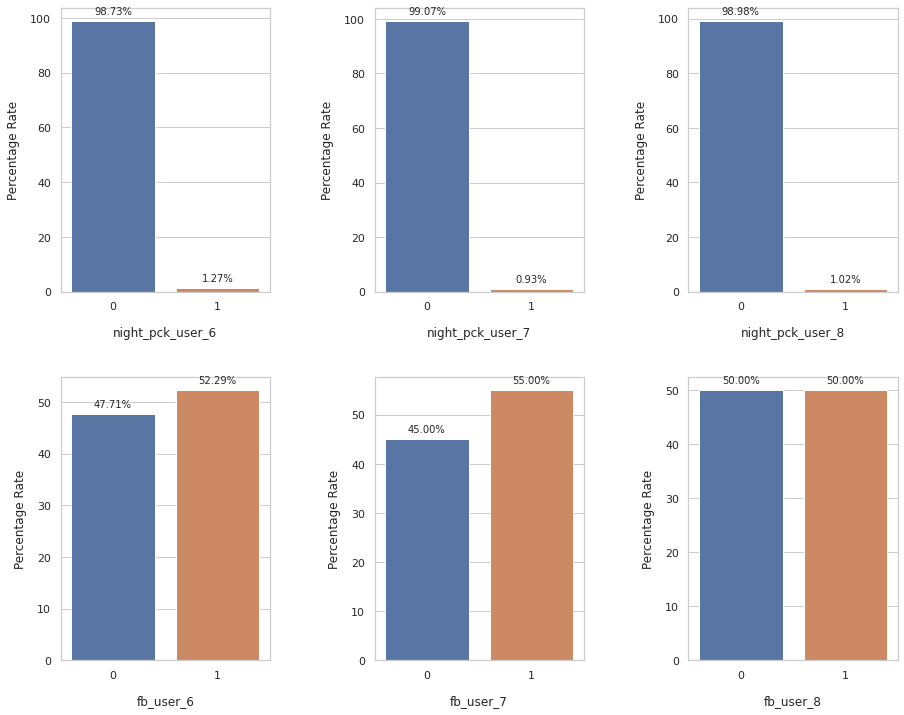

In [61]:
# Univariate Plot Analysis of Ordered categorical variables vs Percentage Rate
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
counter = 1

plt.figure(figsize = (15, 12))

for col_list in category_list:
        
    series = round(((telecom_data[col_list].value_counts(dropna = False))/(len(telecom_data[col_list])) * 100), 2)

    plt.subplot(2, 3, counter)
    ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
    plt.xlabel(col_list, labelpad = 15)
    plt.ylabel('Percentage Rate', labelpad = 10)

    # Call Custom Function
    add_data_labels(ax)

    counter += 1

del category_list, counter, ax

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

From the `night_pck_user` variables, it can be inferred that almost 99% of users are not using nightly pack in all the 3 months.

However users are using facebook(fb) `fb_user` in equal percentage and it is observed that as the month increases, there is a decline in the fb usage.

Positive examples = 92
Negative examples = 1088
Proportion of positive to negative examples = 8.46%


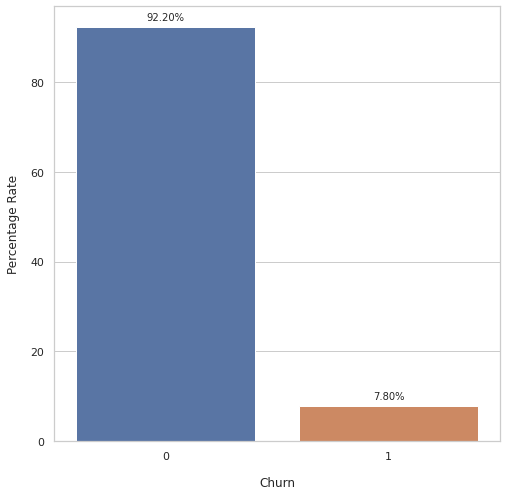

In [62]:
# Get number of positve and negative examples
pos = telecom_data[telecom_data["churn"] == 1].shape[0]
neg = telecom_data[telecom_data["churn"] == 0].shape[0]

print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(pos / neg) * 100:.2f}%")

plt.figure(figsize = (8, 8))

series = round(((telecom_data["churn"].value_counts(dropna = False))/(len(telecom_data["churn"])) * 100), 2)

ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
plt.xlabel("Churn", labelpad = 15)
plt.ylabel('Percentage Rate', labelpad = 10)

# Call Custom Function
add_data_labels(ax)

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

### Data :

**From the above bar plot it is evident that the dataset is highly imbalanced. 

In [63]:
# Custom Function for Default Plotting variables


def set_plotting_variable(figure_title, xlabel, ylabel):
    
    plt.title(figure_title)
    plt.xlabel(xlabel, labelpad = 15)
    plt.ylabel(ylabel, labelpad = 10)

In [64]:
# Custom Function for Univariate Analysis


def plot_univariate(figsize_x, figsize_y, subplot_x, subplot_y, xlabel, ylabel, x_axis, data, wspace):
    
    plt.figure(figsize = (figsize_x, figsize_y))
    
    title_1 = "Distribution Plot of " + xlabel
    title_2 = "Box Plot of " + xlabel

    # Subplot - 1
    plt.subplot(subplot_x, subplot_y, 1)

    sns.distplot(data[x_axis], hist = True, kde = True, color = 'g')
    # Call Custom Function
    set_plotting_variable(title_1, xlabel, ylabel)

    # Subplot - 2
    plt.subplot(subplot_x, subplot_y, 2)

    sns.boxplot(x = x_axis, data = data, color = 'm')
    # Call Custom Function
    set_plotting_variable(title_2, xlabel, ylabel)
    
    plt.subplots_adjust(wspace = wspace)
    plt.show()

In [65]:
# Univariate Plot Analysis of Quantitative Variables

# category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 
#                  'fb_user_6', 'fb_user_7', 'fb_user_8', 'churn']
# counter = 1

# for col_list in telecom_data.columns:
    
#     if col_list not in category_list:
        
#         # Call Custom Function
#         plot_univariate(figsize_x = 20,
#                         figsize_y = 8,
#                         subplot_x = 1,
#                         subplot_y = 2,
#                         xlabel = col_list,
#                         ylabel = "Distribution",
#                         x_axis = col_list,
#                         data = telecom_data,
#                         wspace = 0.2)

#         counter += 1

There are lot of Outliers present in the variables. We will remove these outliers by performaing normalization in the latter stage.

In [66]:
# Custom Function for Bivariate Analysis


def plot_bivariate(y_axis):
    
    plt.figure(figsize = (15, 5))
    
    xlabel = "Churn"
    x_axis = "churn"
    
    title_1 = "Month 6 - " + xlabel
    title_2 = "Month 7 - " + xlabel
    title_3 = "Month 8 - " + xlabel
    
    print("\nData Visualization of churn vs " + y_axis)

    # Subplot - 1
    plt.subplot(1, 3, 1)

    sns.boxplot(x = x_axis, y = y_axis + "_6", hue = "churn", data = telecom_data, showfliers = False)
    #sns.barplot(x = x_axis, y = y_axis + "_6", hue = "churn", data = telecom_data)
    # Call Custom Function
    set_plotting_variable(title_1, xlabel, y_axis + "_6")

    # Subplot - 2
    plt.subplot(1, 3, 2)

    sns.boxplot(x = x_axis, y = y_axis + "_7", hue = "churn", data = telecom_data, showfliers = False)
    #sns.barplot(x = x_axis, y = y_axis + "_7", hue = "churn", data = telecom_data)
    # Call Custom Function
    set_plotting_variable(title_2, xlabel, y_axis + "_7")
    
    # Subplot - 3
    plt.subplot(1, 3, 3)

    sns.boxplot(x = x_axis, y = y_axis + "_8", hue = "churn", data = telecom_data, showfliers = False)
    #sns.barplot(x = x_axis, y = y_axis + "_8", hue = "churn", data = telecom_data)
    # Call Custom Function
    set_plotting_variable(title_3, xlabel, y_axis + "_8")
    
    plt.subplots_adjust(wspace = 0.4)
    plt.show()

In [67]:
telecom_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1,1,1,968.0,30.40,0.00,101.20,252.0,252.0,252.0,1
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,422.16,533.91,255.79,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,427.88,355.23,188.04,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,802.0,57.74,19.38,18.74,0.0,0.0,0.0,1
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,378.09,288.18,63.04,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,81.43,23.83,15.79,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.00,356.00,0.03,0.00,750.95,11.94,0,0,0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,315.0,21.03,910.65,122.16,0.0,354.0,207.0,0
3,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,97.04,94.09,129.74,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,125.33,87.68,159.11,81.76,44.21,101.93,207.09,131.89,261.04,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22.0,26.0,27.0,600.0,680.0,718.0,50.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,720.0,0.00,0.00,0.00,0.0,0.0,0.0,0
4,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,131.91,133.68,182.14,2.36,6.35,39.61,0.0,0.01,0.00,0.1,0.0,17.71,0.0,0.0,0.0,134.38,140.04,239.48,116.63,174.41,224.21,2.94,14.89,57.29,119.58,222.89,298.33,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06,3.0,5.0,4.0,0.0,454.0,439.0,0.0,179.0,179.0,0.0,2.0,2.0,0.0,179.0,179.0,0.0,0.0,0.0,0.0,2.0,2.0,0.00,0.48,0.01,0.00,599.09,1009.92,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0,1,1,604.0,40.45,


Data Visualization of churn vs arpu


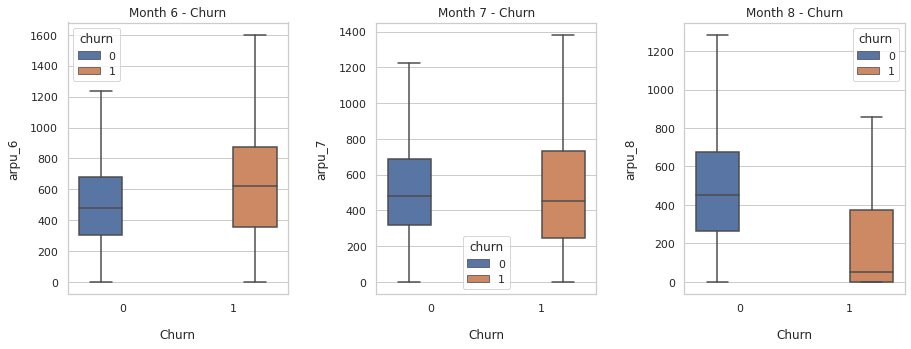


Data Visualization of churn vs onnet_mou


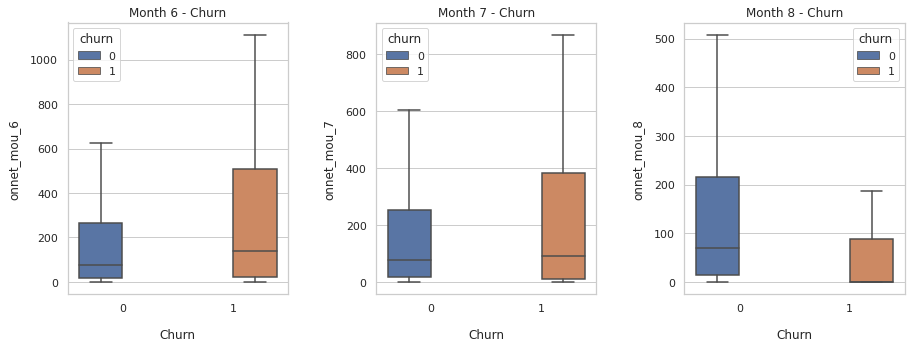


Data Visualization of churn vs offnet_mou


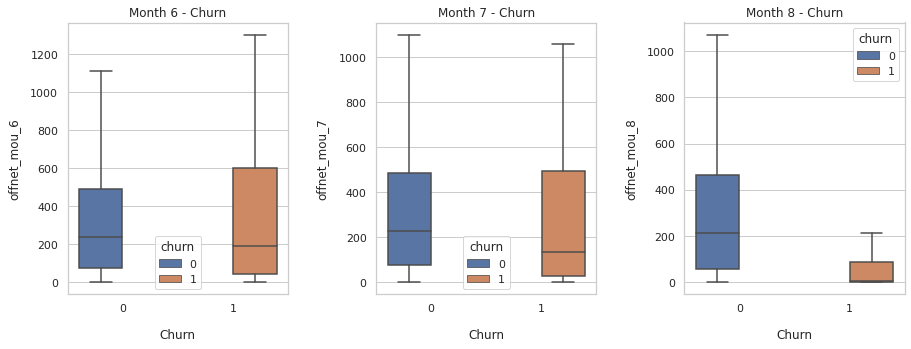


Data Visualization of churn vs total_og_mou


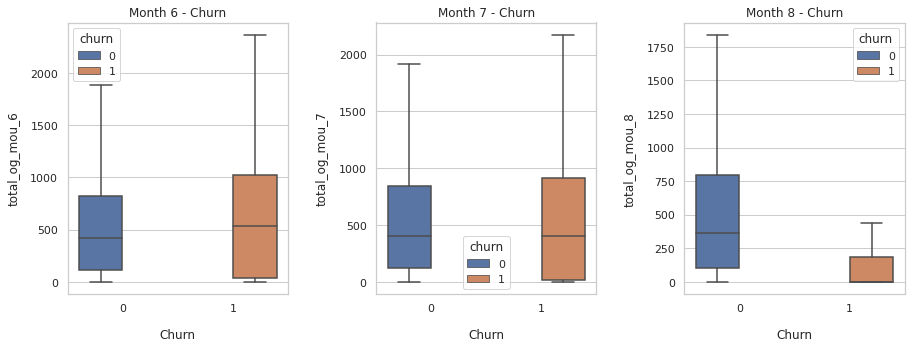


Data Visualization of churn vs total_ic_mou


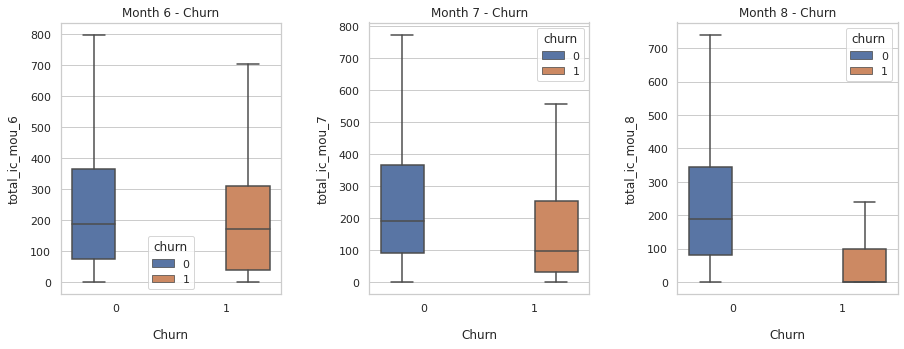


Data Visualization of churn vs total_rech_num


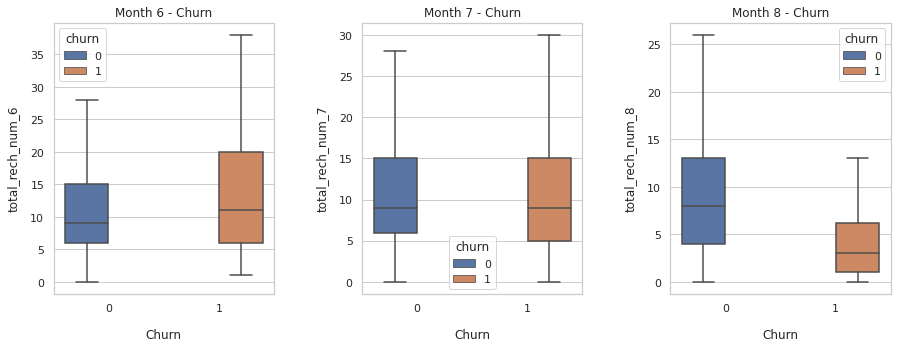


Data Visualization of churn vs total_rech_amt


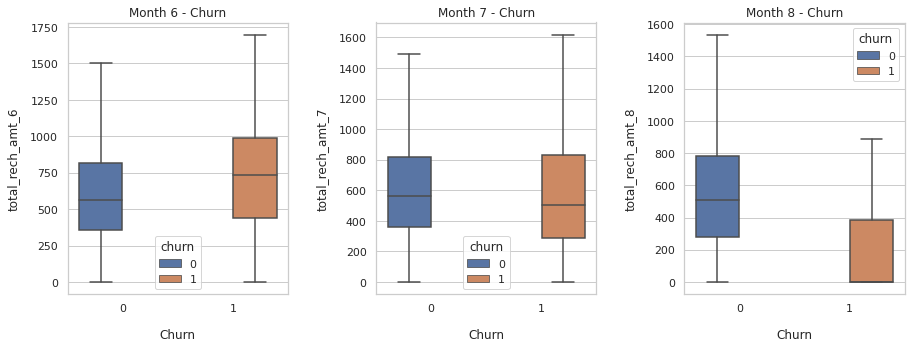


Data Visualization of churn vs total_rech_data


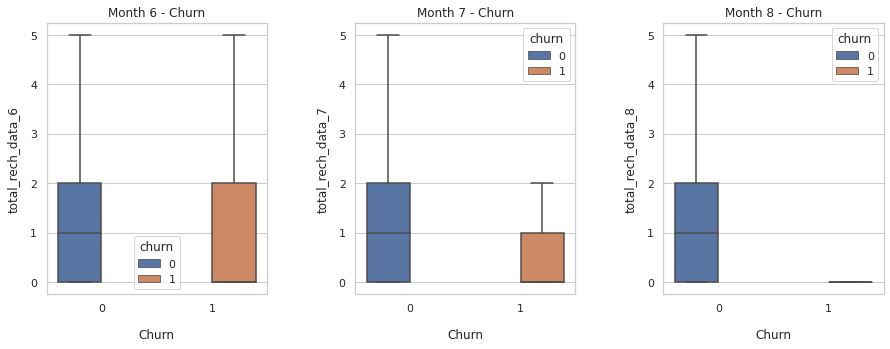


Data Visualization of churn vs vol_2g_mb


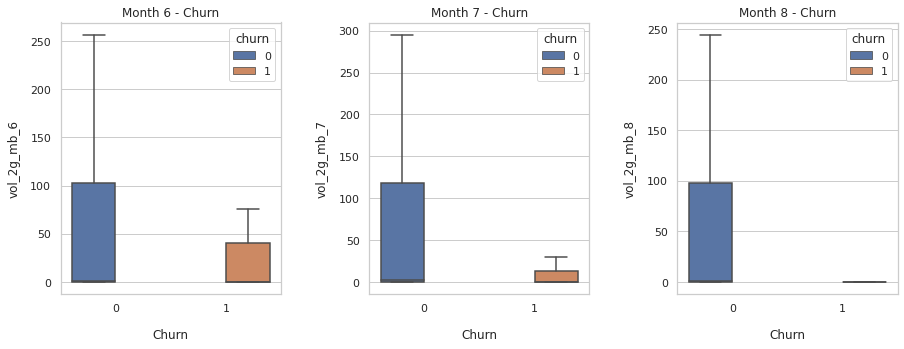


Data Visualization of churn vs vol_3g_mb


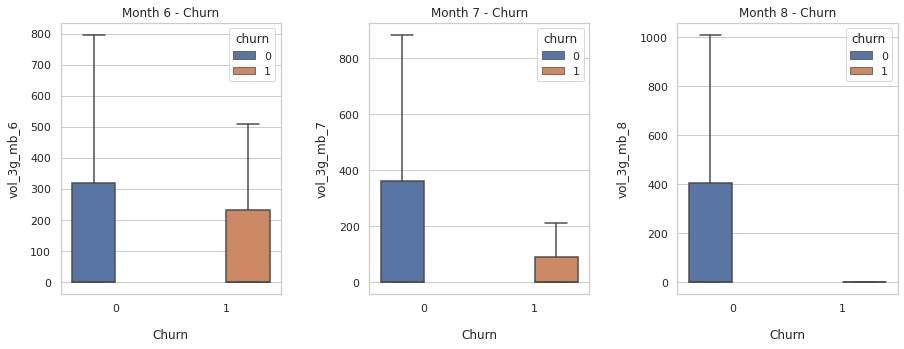


Data Visualization of churn vs vbc_3g


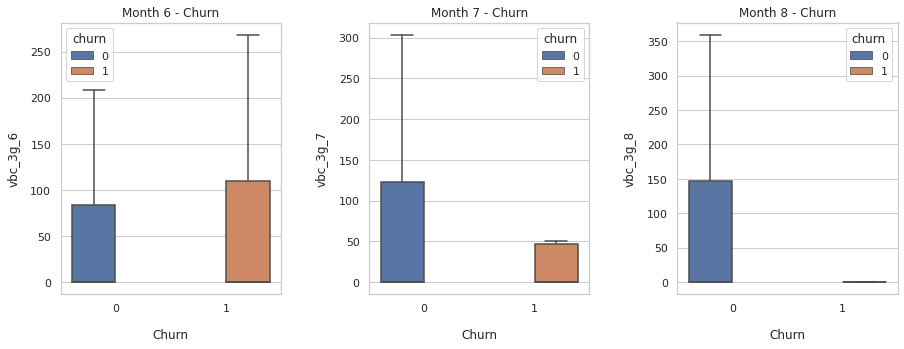


Data Visualization of churn vs total_data_rech_amt


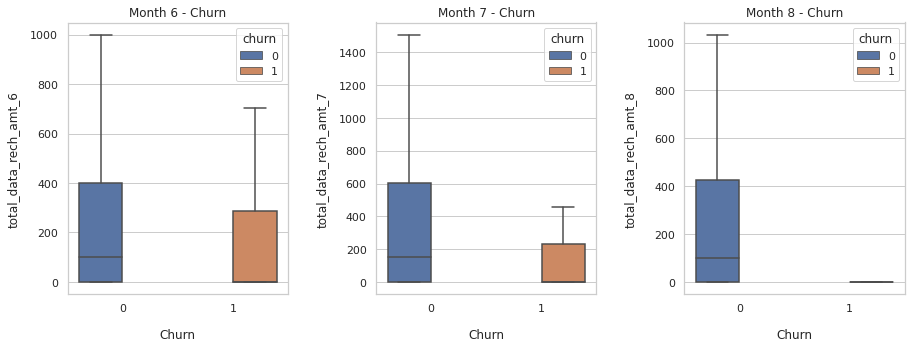

In [68]:
# Bivariate Analysis

plot_bivariate("arpu")

plot_bivariate("onnet_mou")

plot_bivariate("offnet_mou")

plot_bivariate("total_og_mou")

plot_bivariate("total_ic_mou")

plot_bivariate("total_rech_num")

plot_bivariate("total_rech_amt")

plot_bivariate("total_rech_data")

plot_bivariate("vol_2g_mb")

plot_bivariate("vol_3g_mb")

plot_bivariate("vbc_3g")

plot_bivariate("total_data_rech_amt")

There is a significant drop in the columns for data in 8th month for churned customers.

In [69]:
telecom_data.corr()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
arpu_6,1.000000,0.619609,0.543158,0.428187,0.256001,0.260712,0.644871,0.423080,0.353630,0.130377,0.085051,0.068486,0.210429,0.198966,0.147779,0.487855,0.352460,0.373636,0.426560,0.258826,0.167253,0.349249,0.218211,0.280713,0.164504,0.050857,0.055909,0.175506,-0.010900,0.022192,0.669776,0.439188,0.389287,0.347029,0.298337,0.241988,0.159787,0.129570,0.099939,0.390484,0.328091,0.265783,0.081857,-0.090268,-0.004163,0.157928,0.097230,0.118930,0.024229,0.059313,0.024985,0.417566,0.180532,0.147218,0.950636,0.586976,0.531025,0.334486,0.227810,0.194668,-0.161460,-0.216761,-0.136914,0.024258,-0.034217,0.007481,-0.188224,-0.236608,-0.186005,0.009610,-0.017770,0.025766,-0.080544,-0.115528,-0.101374,0.085274,0.053304,0.070625,0.031640,0.047095,-0.010410,-0.064631,-0.099921,-0.077245,-0.176163,-0.219249,-0.174867,0.098315,0.042627,0.086410,-0.036551,-0.048405,-0.010355,-0.186410,-0.237167,-0.204044,0.046543,0.049332,0.085644,0.103061,-0.039819,-0.054933,0.002540,0.097119
arpu_7,0.619609,1.000000,0.614855,0.250706,0.348048,0.243911,0.401037,0.539256,0.399522,0.070776,0.110921,0.108567,0.110115,0.196444,0.151148,0.260756,0.365640,0.249865,0.292029,0.416389,0.302344,0.287403,0.442822,0.244334,0.104418,0.086101,0.091258,0.073211,-0.015871,0.029045,0.410432,0.589897,0.404910,0.174747,0.246886,0.172714,0.096550,0.168818,0.136220,0.200150,0.307583,0.215649,0.016674,-0.042495,-0.027424,0.067578,0.160350,0.082242,0.049915,0.059533,0.000575,0.191375,0.328116,0.178447,0.622595,0.948915,0.575865,0.301517,0.426644,0.233244,-0.188630,-0.109043,-0.104786,-0.028045,0.083153,0.038599,-0.209549,-0.166056,-0.158914,-0.011616,0.098887,0.051712,-0.103859,-0.040872,-0.038191,0.062083,0.174416,0.112149,0.026766,0.047354,0.003671,-0.119885,-0.012989,-0.034043,-0.188091,-0.163140,-0.154253,0.106545,0.197060,0.140417,-0.063695,-0.006590,-0.005717,-0.203582,-0.132491,-0.139009,0.027163,0.092670,0.139306,0.091796,-0.075208,0.115394,0.019068,0.055794
arpu_8,0.543158,0.614855,1.000000,0.219277,0.272060,0.395463,0.292011,0.368281,0.618235,0.059935,0.079026,0.074519,0.121437,0.201071,0.169019,0.321804,0.343449,0.436969,0.115865,0.235958,0.452291,0.192268,0.106226,0.257284,0.133493,0.088551,0.150556,0.054081,-0.013290,0.032135,0.314838,0.411676,0.647161,0.211536,0.255616,0.329684,0.102657,0.114784,0.178878,0.239850,0.285211,0.377187,0.047768,-0.049197,-0.004503,0.095179,0.099331,0.138864,0.048277,0.061188,0.067092,0.163952,0.208693,0.405489,0.543732,0.586289,0.945611,0.289775,0.274136,0.422381,-0.154498,-0.132617,0.033578,-0.011790,-0.001605,0.148658,-0.162184,-0.158087,-0.055797,-0.030369,0.01

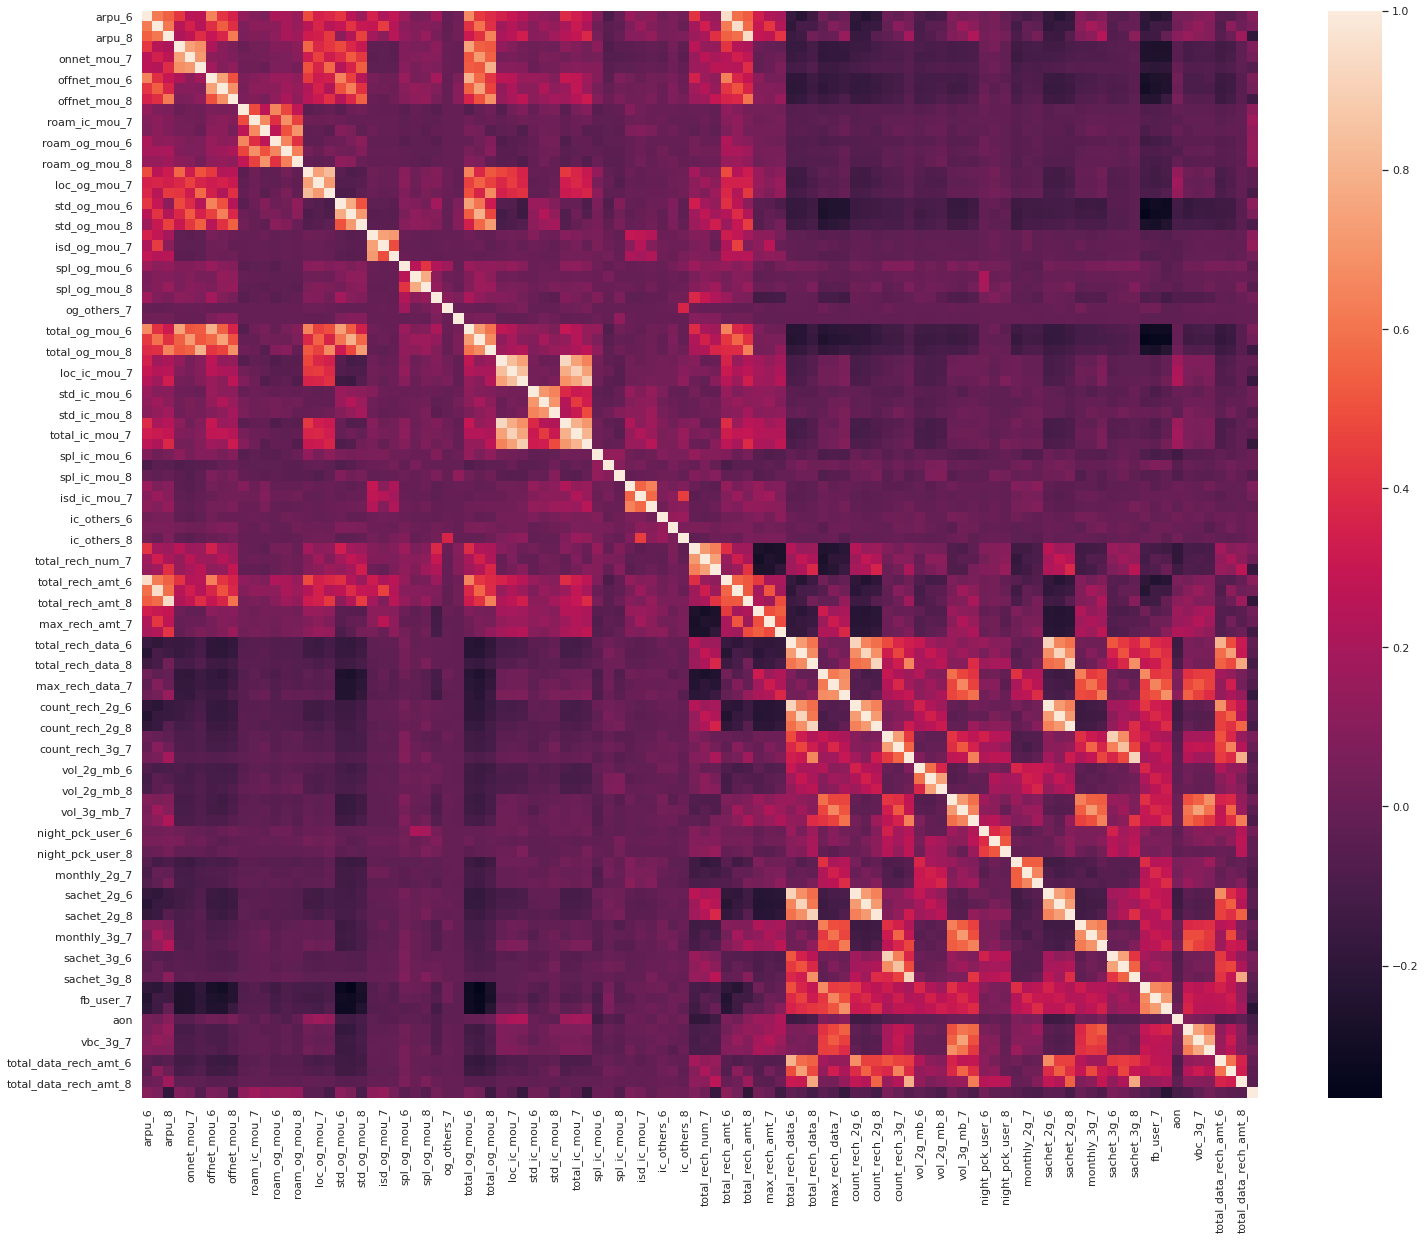

In [70]:
plt.figure(figsize = (25, 20))

sns.heatmap(telecom_data.corr())

plt.show()

In [71]:
#getting corr vars
corr_matrix = telecom_data.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
upper_triangle = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)))

highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]
print("List of highly correlated features from the above plot - \n\n", highly_correlated_features)
print("\n\nTotal features with high correlation - ", len(highly_correlated_features))

List of highly correlated features from the above plot - 

 ['loc_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'total_data_rech_amt_6']


Total features with high correlation -  19


### Data Insight

- There are many features that are highly correlated.
- Total of 25 features with a correlation > 0.80

In [72]:
# Custom Function to derive new good phase columns and drop the original columns 
def derive_good_action_phase(df, col):
    
    col_6 = col + "_6"
    col_7 = col + "_7"
    col_8 = col + "_8"
    good_phase_col = col + "_good_phase"
    action_phase_col = col + "_action_phase"
    
    df[good_phase_col] = (df[col_6] + df[col_7])/2
    df[action_phase_col] = df[col_8] - df[good_phase_col]
    
    df.drop([col_6, col_7, col_8], axis = 1, inplace = True)
    
    return df

In [73]:
# Derive Good and Action Phase Variables

telecom_data = derive_good_action_phase(telecom_data, "arpu")

telecom_data = derive_good_action_phase(telecom_data, "onnet_mou")

telecom_data = derive_good_action_phase(telecom_data, "offnet_mou")

telecom_data = derive_good_action_phase(telecom_data, "roam_ic_mou")

telecom_data = derive_good_action_phase(telecom_data, "roam_og_mou")

telecom_data = derive_good_action_phase(telecom_data, "loc_og_mou")

telecom_data = derive_good_action_phase(telecom_data, "std_og_mou")

telecom_data = derive_good_action_phase(telecom_data, "isd_og_mou")

telecom_data = derive_good_action_phase(telecom_data, "spl_og_mou")

telecom_data = derive_good_action_phase(telecom_data, "og_others")

telecom_data = derive_good_action_phase(telecom_data, "total_og_mou")

telecom_data = derive_good_action_phase(telecom_data, "loc_ic_mou")

telecom_data = derive_good_action_phase(telecom_data, "std_ic_mou")

telecom_data = derive_good_action_phase(telecom_data, "spl_ic_mou")

telecom_data = derive_good_action_phase(telecom_data, "isd_ic_mou")

telecom_data = derive_good_action_phase(telecom_data, "ic_others")

telecom_data = derive_good_action_phase(telecom_data, "total_ic_mou")

telecom_data = derive_good_action_phase(telecom_data, "total_rech_num")

telecom_data = derive_good_action_phase(telecom_data, "total_rech_amt")

telecom_data = derive_good_action_phase(telecom_data, "max_rech_amt")

telecom_data = derive_good_action_phase(telecom_data, "total_rech_data")

telecom_data = derive_good_action_phase(telecom_data, "max_rech_data")

telecom_data = derive_good_action_phase(telecom_data, "count_rech_2g")

telecom_data = derive_good_action_phase(telecom_data, "count_rech_3g")

telecom_data = derive_good_action_phase(telecom_data, "vol_2g_mb")

telecom_data = derive_good_action_phase(telecom_data, "vol_3g_mb")

telecom_data = derive_good_action_phase(telecom_data, "monthly_2g")

telecom_data = derive_good_action_phase(telecom_data, "sachet_2g")

telecom_data = derive_good_action_phase(telecom_data, "monthly_3g")

telecom_data = derive_good_action_phase(telecom_data, "sachet_3g")

telecom_data = derive_good_action_phase(telecom_data, "vbc_3g")

telecom_data = derive_good_action_phase(telecom_data, "total_data_rech_amt")

telecom_data.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,churn,arpu_good_phase,arpu_action_phase,onnet_mou_good_phase,onnet_mou_action_phase,offnet_mou_good_phase,offnet_mou_action_phase,roam_ic_mou_good_phase,roam_ic_mou_action_phase,roam_og_mou_good_phase,roam_og_mou_action_phase,loc_og_mou_good_phase,loc_og_mou_action_phase,std_og_mou_good_phase,std_og_mou_action_phase,isd_og_mou_good_phase,isd_og_mou_action_phase,spl_og_mou_good_phase,spl_og_mou_action_phase,og_others_good_phase,og_others_action_phase,total_og_mou_good_phase,total_og_mou_action_phase,loc_ic_mou_good_phase,loc_ic_mou_action_phase,std_ic_mou_good_phase,std_ic_mou_action_phase,spl_ic_mou_good_phase,spl_ic_mou_action_phase,isd_ic_mou_good_phase,isd_ic_mou_action_phase,ic_others_good_phase,ic_others_action_phase,total_ic_mou_good_phase,total_ic_mou_action_phase,total_rech_num_good_phase,total_rech_num_action_phase,total_rech_amt_good_phase,total_rech_amt_action_phase,max_rech_amt_good_phase,max_rech_amt_action_phase,total_rech_data_good_phase,total_rech_data_action_phase,max_rech_data_good_phase,max_rech_data_action_phase,count_rech_2g_good_phase,count_rech_2g_action_phase,count_rech_3g_good_phase,count_rech_3g_action_phase,vol_2g_mb_good_phase,vol_2g_mb_action_phase,vol_3g_mb_good_phase,vol_3g_mb_action_phase,monthly_2g_good_phase,monthly_2g_action_phase,sachet_2g_good_phase,sachet_2g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase,total_data_rech_amt_good_phase,total_data_rech_amt_action_phase
0,0,0,0,1,1,1,968.0,1,206.1005,7.7025,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.0,0.0,0.000,0.000,0.000,5.440,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.440,3.5,-1.5,307.0,-55.0,252.0,0.0,1.0,0.0,252.0,0.0,0.0,0.0,1.0,0.0,15.725,-9.975,117.165,-7.555,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.600,-20.200,252.0,0.0
1,0,0,0,0,0,0,802.0,1,1209.5150,1961.9650,56.26,-3.97,510.295,-184.385,24.86,6.78,18.165,19.895,478.035,-222.245,68.000,9.840,0.090,9.920,2.25,4.25,0.0,0.0,548.385,-198.225,391.555,-203.515,176.810,17.130,0.105,-0.105,8.295,23.295,15.465,-0.325,592.250,-163.510,5.0,2.0,1185.0,2453.0,1185.0,395.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.060,38.680,0.0,0.0
2,0,0,0,0,1,1,315.0,0,435.4720,-298.1100,382.36,-347.28,87.645,48.835,0.00,0.00,0.000,0.000,333.135,-270.095,136.870,-38.590,0.000,0.000,0.00,10.23,0.0,0.0,470.010,-298.450,52.630,-36.840,13.545,-12.795,0.000,0.000,0.000,0.000,0.000,0.000,66.175,-49.635,20.0,-6.0,519.0,-399.0,122.0,-92.0,1.0,2.0,77.0,-54.0,1.0,2.0,0.0,0.0,178.000,-177.970,375.475,-363.535,0.5,-0.5,0.5,2.5,0.0,0.0,0.0,0.0,516.405,-495.375,177.0,30.0
3,0,0,0,0,0,0,720.0,0,556.1030,81.6570,117.26,-32.12,827.305,156.085,0.00,0.00,0.000,0.000,95.565,34.175,848.990,89.800,0.000,0.000,0.00,0.00,0.0,0.0,944.565,123.975,106.505,52.605,62.985,38.945,0.000,0.000,0.000,0.000,0.000,0.000,169.490,91.550,24.0,3.0,640.0,78.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0
4,0,0,0,0,1,1,604.0,0,134.1235,232.8425,49.81,-16.23,87.385,118.505,0.00,0.00,0.000,0.000,132.795,49.345,4.355,35.255,0.005,-0.005,0.05,17.66,0.0,0.0,137.210,102.270,145.520,78.690,8.915,48.375,0.000,0.000,14.115,-10.375,2.675,10.385,171.235,127.095,4.0,0.0,227.0,212.0,89.5,89.5,1.0,1.0,89.5,89.5,0.0,0.0,1.0,1.0,0.240,-0.230,299.545,710.375,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,25.930,14.520,356.0,184.0


In [74]:
telecom_data.shape

(1180, 72)

# Modelling

In [75]:
# train test split
X = telecom_data.drop('churn', axis = 1)
y = telecom_data[['churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(826, 71)
(826, 1)
(354, 71)
(354, 1)


In [76]:
# Normalize the data
scaler = RobustScaler()

scaled_data = scaler.fit_transform(X_train)

X_train = pd.DataFrame(data = scaled_data, index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

In [77]:
# treating the imbalanced data

In [78]:
# Implement SMOTEENN
def implement_smoteenn(X_train, y_train):
    
    sampling = SMOTEENN(random_state = 100)
    X_train_resampled, y_train_resampled = sampling.fit_resample(X_train.values, y_train.values.ravel())

    # Shuffle the data
    perms = np.random.permutation(X_train_resampled.shape[0])
    X_train_resampled = X_train_resampled[perms]
    y_train_resampled = y_train_resampled[perms]

    X_train_resampled = pd.DataFrame(data = X_train_resampled)
    y_train_resampled = pd.DataFrame(data = y_train_resampled)

    print(X_train_resampled.shape)
    print(y_train_resampled.shape)
    
    return X_train_resampled, y_train_resampled

In [79]:
# Custom Function for ensembling classifiers using sampling and then Shuffling the data

def transform(transformer, X, y):
    
    print("Transforming {}".format(transformer.__class__.__name__))
    
    X_resampled, y_resampled = transformer.fit_resample(X.values, y.values.ravel())
    
    # Shuffle the data
    perms = np.random.permutation(X_resampled.shape[0])
    X_resampled = X_resampled[perms]
    y_resampled = y_resampled[perms]
    
    # Return the classifier, X_resampled and y_resampled
    return transformer.__class__.__name__, pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)

In [80]:
# Custom Function to Apply transformations to dataset

def apply_transformations(dataset, X_train, y_train):
    
    dataset.append(("base", X_train, y_train))
    dataset.append(transform(SMOTEENN(random_state = 100), X_train, y_train))
    
    return dataset

## <font color = brown>4. Model Building</font>

In [81]:
# Custom Function to get Scores and plots
def get_scores(scores, reg, X_test):
    


    pred_test = reg.predict(X_test.values)

    pred_test_probs = reg.predict_proba(X_test.values)[:, 1:]

    fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), pred_test)
    p, r, t = precision_recall_curve(y_test.values.ravel(), pred_test_probs)

    model_f1_score = f1_score(y_test.values.ravel(), pred_test)
    model_precision_score = precision_score(y_test.values.ravel(), pred_test)
    model_recall_score = recall_score(y_test.values.ravel(), pred_test)
    model_accuracy_score = accuracy_score(y_test.values.ravel(), pred_test)


    scores.append((model_f1_score,
                   model_precision_score,
                   model_recall_score,
                   model_accuracy_score,
                   confusion_matrix(y_test.values.ravel(), pred_test)))


    return scores

In [82]:
# Custom Function for Model Building

def model(sampling_type, X, y, param_grid, model_type, ml = 'None'):
    
    model_type_list = ['Logistic', 'SVM', 'Decision Tree', 'Random Forest', 'Adaboost', 'XGBoost', 'LightGBM']
    
    if model_type == 'Logistic':
    
        ml = LogisticRegression(penalty = 'l2', C = 10, n_jobs = -1, random_state = 100)
    
    elif model_type == 'SVM':
        
        ml = SVC(C = 1000, kernel = 'rbf', probability = True, random_state = 100)
    
    elif model_type == 'Decision Tree':
        
        ml = DecisionTreeClassifier(max_depth = 7, min_samples_split = 26, min_samples_leaf = 46, random_state = 100)
    
    elif model_type == 'Random Forest':
        
        ml = RandomForestClassifier(n_estimators = 900, max_depth = 29, min_samples_split = 2, min_samples_leaf = 1,
                                    n_jobs = -1, random_state = 100)
    
    elif model_type == 'Adaboost':
        
        dt = DecisionTreeClassifier(max_depth = 17, min_samples_split = 3, min_samples_leaf = 1, random_state = 100)

        ml = AdaBoostClassifier(base_estimator = dt, n_estimators = 300, learning_rate = 0.3, random_state = 100)
    
    elif model_type == 'XGBoost':
        
        ml = XGBClassifier(max_depth = 18, learning_rate = 0.3, n_estimators = 900, min_child_weight = 1,
                           subsample = 0.9, colsample_bytree = 0.4, n_jobs = -1, random_state = 100)
    
    elif model_type == 'LightGBM':
        
        ml = LGBMClassifier(num_leaves = 70, max_depth = 29, learning_rate = 0.5, n_estimators = 600,
                            min_child_samples = 20, subsample = 0.1, colsample_bytree = 1,
                            objective = 'binary', n_jobs = -1, random_state = 100)
    
    if model_type not in model_type_list:
        
        gc = GridSearchCV(estimator = ml, param_grid = param_grid, scoring = 'roc_auc',
                          n_jobs = 15, cv = 5, verbose = 2, return_train_score=True)
    
    else:
        
        gc = ml
    
    gc = gc.fit(X.values, y.values.ravel())
    
    if model_type in model_type_list:
        
        return sampling_type, gc
    
    else:
        
        return gc

In [83]:
# Custom Function to plot GridSearch Result to get the best value

def hypertuning_plot(scores, parameter):
    
    col = "param_" + parameter
    
    plt.figure()
    
    
    plt.plot(scores[col], scores["mean_train_score"], label = "training accuracy")
    plt.plot(scores[col], scores["mean_test_score"], label = "test accuracy")
    
    plt.xlabel(parameter)
    plt.ylabel("Accuracy")
    
    plt.legend()
    plt.show()

In [84]:
# Custom Function to Train/evaluate models for each of tranformed datasets

def evaluate_train(scores, benchmark_scores, dataset, X_test):
    
    # Plot ROC and PR curves using all models and test data
    fig, axes = plt.subplots(1, 2, figsize = (14, 6))

    # train models based on benchmark params
    for sampling_type, reg in benchmark_scores:

        print("Training on {}".format(sampling_type))

        for s_type, X, y in dataset:

            if s_type == sampling_type:

                pred_test = reg.predict(X_test.values)

                probs = reg.predict_proba(X_test.values)[:, 1:]

                fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), pred_test)
                p, r, t = precision_recall_curve(y_test.values.ravel(), probs)

                model_f1_score = f1_score(y_test.values.ravel(), pred_test)
                model_precision_score = precision_score(y_test.values.ravel(), pred_test)
                model_recall_score = recall_score(y_test.values.ravel(), pred_test)
                model_accuracy_score = accuracy_score(y_test.values.ravel(), pred_test)

                scores.append((sampling_type,
                               model_f1_score,
                               model_precision_score,
                               model_recall_score,
                               model_accuracy_score,
                               confusion_matrix(y_test.values.ravel(), pred_test)))


    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].legend(loc = "lower right")
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate")

    axes[1].legend()
    axes[1].set_xlabel("recall")
    axes[1].set_ylabel("precision")
    axes[1].set_title("PR curve")

    plt.tight_layout()
    plt.show()
    
    return scores

Dimensionality Reduction

In [86]:
def perform_PCA(X):
    
    pca = PCA(svd_solver = 'randomized', random_state = 100)

    #Doing the PCA on the train data
    pca.fit(X)
    
    # Making the screeplot - plotting the cumulative variance against the number of components
    fig = plt.figure(figsize = (12,8))

    plt.plot(np.cumsum(pca.explained_variance_ratio_))

    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

In [87]:
def perform_incremental_PCA(X_train, y_train, components):
    
    # Using incremental PCA for efficiency - saves a lot of time on larger datasets

    pca_final = IncrementalPCA(n_components = components)

    X_train_pca = pca_final.fit_transform(X_train)
    X_test_pca = pca_final.transform(X_test)

    X_train_pca = pd.DataFrame(data = X_train_pca)
    X_test_pca = pd.DataFrame(data = X_test_pca)

    print(X_train_pca.shape)
    print(y_train.shape)
    print(X_test_pca.shape)
    print(y_test.shape)
    
    #creating correlation matrix for the principal components
    corrmat = np.corrcoef(X_train_pca.transpose())

    #plotting the correlation matrix
    plt.figure(figsize = (20,10))
    sns.heatmap(corrmat, annot = True)
    plt.show()
    
    # 1s -> 0s in diagonals
    corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
    print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
    # we see that correlations are indeed very close to 0
    
    return X_train_pca, X_test_pca

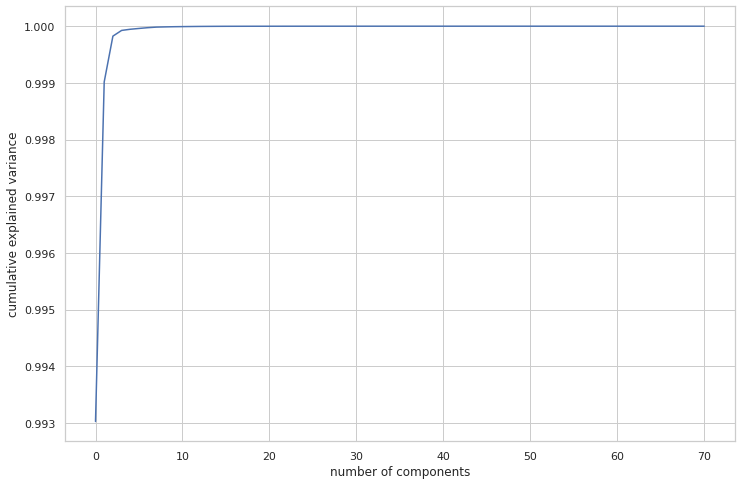

In [88]:
perform_PCA(X_train)

Looks like 5 components are enough to describe 95% of the variance in the dataset. Let's choose 5 components for modeling.

(826, 5)
(826, 1)
(354, 5)
(354, 1)


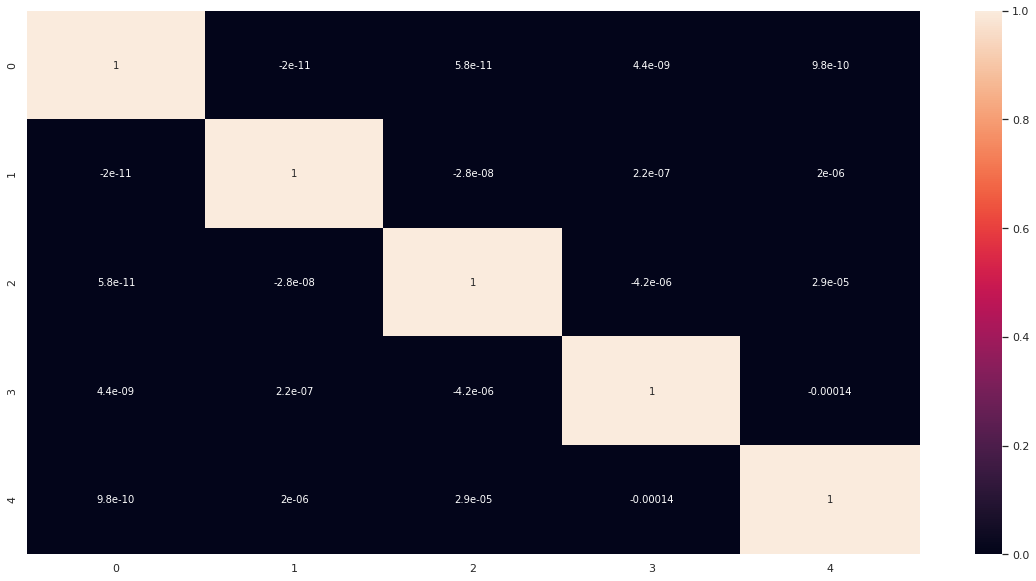

max corr: 2.8578169060859072e-05 , min corr:  -0.00013641023082456175


In [89]:
X_train_pca, X_test_pca = perform_incremental_PCA(X_train, y_train, 5)

**There is no correlation between any two components.**

#### Now Let's handle Class Imbalance on PCA derived data

In [90]:
# Implement SMOTEENN
X_train_resampled, y_train_resampled = implement_smoteenn(X_train_pca, y_train)

(950, 5)
(950, 1)


Logistic regression

In [91]:
# Logistic Regression with Default Parameters

lr = LogisticRegression(n_jobs = -1, random_state = 100)

lr = lr.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, lr, X_test_pca)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                    'confusion_matrix'])
sampling_results

,f1,precision,recall,accuracy,confusion_matrix
0,0.177419,0.111111,0.44,0.711864,"[[241, 88], [14, 11]]"


GRID SEARCH

#### Logistic Regression - HyperTuning Penalty

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   5 out of  10 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=15)]: Done  10 out of  10 | elapsed:    2.3s finished


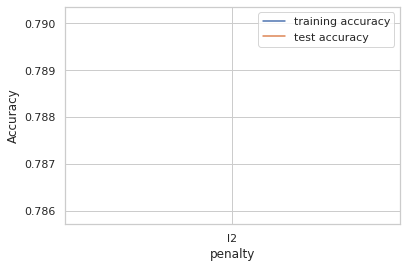

{'penalty': 'l2'}

In [92]:
# GridSearchCV to find best penalty

lr = LogisticRegression(n_jobs = -1, random_state = 100)

parameter = 'penalty'

# parameters to build the model on
param_grid = {parameter: ['l1', 'l2']}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lr)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

#### Logistic Regression - HyperTuning C

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   2 out of  20 | elapsed:    0.4s remaining:    3.7s
[Parallel(n_jobs=15)]: Done  13 out of  20 | elapsed:    2.4s remaining:    1.3s
[Parallel(n_jobs=15)]: Done  20 out of  20 | elapsed:    3.8s finished


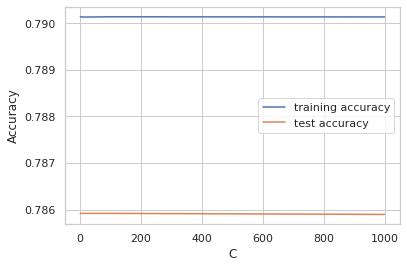

{'C': 1}

In [93]:
# GridSearchCV to find best C

# Penalty remains the same and hence any penalty method (l1 or l2) can be taken into consideration.

lr = LogisticRegression(penalty = 'l2', n_jobs = -1, random_state = 100)

parameter = 'C'

# parameters to build the model on
param_grid = {parameter: [1, 10, 100, 1000]}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lr)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

In [94]:
# Logistic with best parameters obtained from grid search

lr = LogisticRegression(penalty = 'l2', C = 10, n_jobs = -1, random_state = 100)

lrf = lr.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, lrf, X_test_pca)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                  'confusion_matrix'])
sampling_results

,f1,precision,recall,accuracy,confusion_matrix
0,0.177419,0.111111,0.44,0.711864,"[[241, 88], [14, 11]]"


**The score is very low. Let's see the effect of other sampling techniques.**

In [95]:
# Apply Class Imbalance transformations to dataset

dataset = []

dataset = apply_transformations(dataset, X_train_resampled, y_train_resampled)

Transforming SMOTEENN


SVM

In [97]:
# SVM with Default Parameters and probability = True

svm = SVC(kernel = 'rbf', probability = True, random_state = 100)

svm = svm.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, svm, X_test_pca)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                    'confusion_matrix'])
sampling_results

,f1,precision,recall,accuracy,confusion_matrix
0,0.120482,0.086207,0.2,0.793785,"[[276, 53], [20, 5]]"


SVM - HyperTuning

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   5 out of  10 | elapsed:    4.0s remaining:    4.0s
[Parallel(n_jobs=15)]: Done  10 out of  10 | elapsed:    4.3s finished


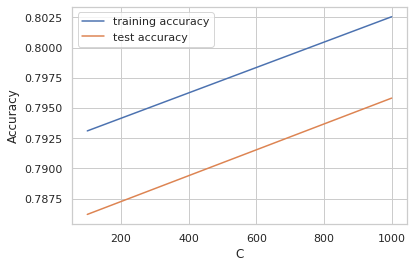

{'C': 1000}

In [98]:
# GridSearchCV to find best min_samples_split

svm = SVC(kernel = 'rbf', probability = True, random_state = 100)

parameter = 'C'

# parameters to build the model on
param_grid = {parameter: [100, 1000]}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', svm)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

#### Running the SVM with best parameters obtained from grid search.

In [99]:
# SVM with best parameters obtained from grid search

svm = SVC(C = 1000, kernel = 'rbf', probability = True, random_state = 100)

svm = svm.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, svm, X_test_pca)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                  'confusion_matrix'])
sampling_results

,f1,precision,recall,accuracy,confusion_matrix
0,0.145455,0.094118,0.32,0.734463,"[[252, 77], [17, 8]]"


In [101]:
# Implement SMOTEENN on the whole train Dataset
X_train_resampled, y_train_resampled = implement_smoteenn(X_train, y_train)

(1075, 71)
(1075, 1)


Applyig adaboost

In [102]:
# Adaboost with Default Parameters

tree = DecisionTreeClassifier(max_depth = 8, min_samples_split = 9, min_samples_leaf = 29, random_state = 100)

abc = AdaBoostClassifier(base_estimator = tree, random_state = 100)

abc = abc.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, abc, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'confusion_matrix'])
sampling_results


,f1,precision,recall,accuracy,confusion_matrix
0,0.430769,0.35,0.56,0.89548,"[[303, 26], [11, 14]]"


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   9 out of  25 | elapsed:  4.2min remaining:  7.5min
[Parallel(n_jobs=15)]: Done  22 out of  25 | elapsed:  5.1min remaining:   41.6s
[Parallel(n_jobs=15)]: Done  25 out of  25 | elapsed:  5.4min finished


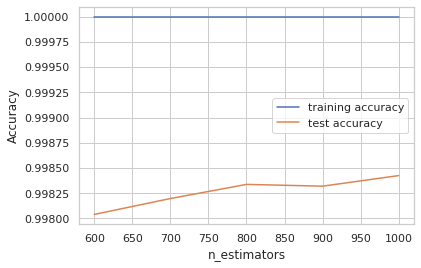

{'n_estimators': 1000}

In [103]:
# GridSearchCV to find best n_estimators

tree = DecisionTreeClassifier(max_depth = 8, min_samples_split = 9, min_samples_leaf = 29, random_state = 100)

abc = AdaBoostClassifier(base_estimator = tree, random_state = 100)

parameter = 'n_estimators'

param_grid = {parameter: range(600, 1100, 100)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', abc)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  11 tasks      | elapsed:  6.6min
[Parallel(n_jobs=15)]: Done  47 out of  50 | elapsed: 14.5min remaining:   55.4s
[Parallel(n_jobs=15)]: Done  50 out of  50 | elapsed: 14.5min finished


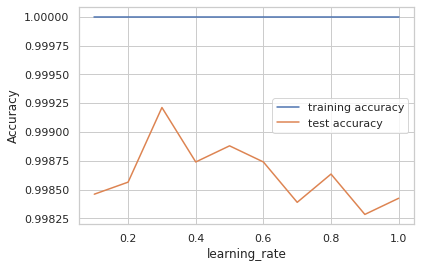

{'learning_rate': 0.30000000000000004}

In [104]:
# GridSearchCV to find best learning_rate

tree = DecisionTreeClassifier(max_depth = 8, min_samples_split = 9, min_samples_leaf = 29, random_state = 100)

abc = AdaBoostClassifier(base_estimator = tree, n_estimators = 1000, random_state = 100)

parameter = 'learning_rate'

param_grid = {parameter: np.arange(0.1, 1.1, 0.1)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', abc)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

In [105]:
# AdaBoost with best parameters obtained from grid search

tree = DecisionTreeClassifier(max_depth = 8, min_samples_split = 9, min_samples_leaf = 29, random_state = 100)

abc = AdaBoostClassifier(base_estimator = tree, n_estimators = 1000, learning_rate = 0.9, random_state = 100)

abc = abc.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, abc, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'confusion_matrix'])
sampling_results

,f1,precision,recall,accuracy,confusion_matrix
0,0.454545,0.365854,0.6,0.898305,"[[303, 26], [10, 15]]"


LIGHTGBM

In [110]:
# LightGBM with Default Parameters

lgb = LGBMClassifier(objective = 'binary', n_jobs = -1, random_state = 100)

lgb = lgb.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, lgb, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                       'confusion_matrix'])
sampling_results

,f1,precision,recall,accuracy,confusion_matrix
0,0.405405,0.306122,0.6,0.875706,"[[295, 34], [10, 15]]"


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  11 tasks      | elapsed:   24.2s
[Parallel(n_jobs=15)]: Done  60 out of  60 | elapsed:   49.0s finished


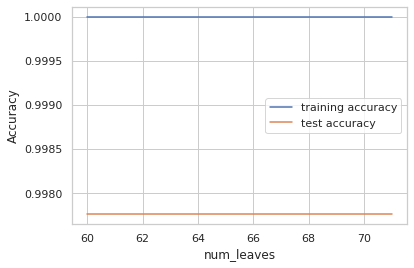

{'num_leaves': 60}

In [112]:
# GridSearchCV to find optimal num_leaves

lgb = LGBMClassifier(objective = 'binary', n_jobs = -1, random_state = 100)

parameter = 'num_leaves'

param_grid = {parameter: range(60, 72)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lgb)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  11 tasks      | elapsed:   13.8s
[Parallel(n_jobs=15)]: Done  55 out of  55 | elapsed:   36.5s finished


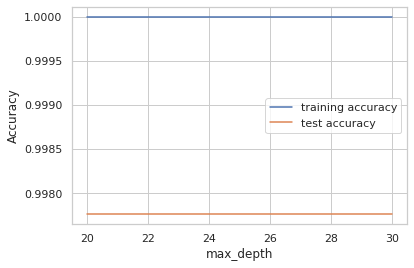

{'max_depth': 20}

In [113]:
# GridSearchCV to find optimal max_depth

lgb = LGBMClassifier(num_leaves = 70, objective = 'binary', n_jobs = -1, random_state = 100)

parameter = 'max_depth'

param_grid = {parameter: range(20,31)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lgb)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   2 out of  15 | elapsed:    1.8s remaining:   11.8s
[Parallel(n_jobs=15)]: Done  10 out of  15 | elapsed:    3.8s remaining:    1.9s
[Parallel(n_jobs=15)]: Done  15 out of  15 | elapsed:    3.8s finished


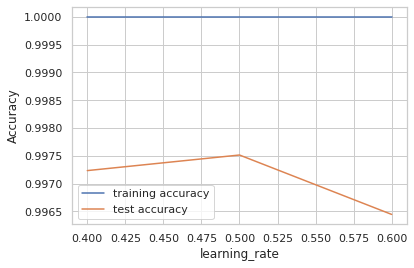

{'learning_rate': 0.5}

In [114]:
# GridSearchCV to find optimal learning_rate

lgb = LGBMClassifier(num_leaves = 70, max_depth = 29, objective = 'binary', n_jobs = -1, random_state = 100)

parameter = 'learning_rate'

param_grid = {parameter: np.arange(0.4, 0.7, 0.1)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lgb)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   2 out of  15 | elapsed:    2.7s remaining:   17.3s
[Parallel(n_jobs=15)]: Done  10 out of  15 | elapsed:    6.1s remaining:    3.1s
[Parallel(n_jobs=15)]: Done  15 out of  15 | elapsed:    6.3s finished


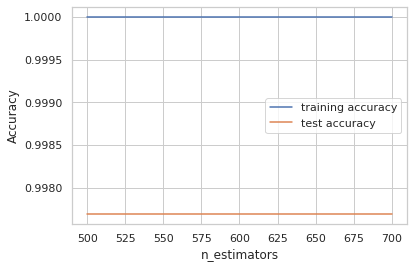

{'n_estimators': 500}

In [115]:
# GridSearchCV to find optimal n_estimators

lgb = LGBMClassifier(num_leaves = 70, max_depth = 29, learning_rate = 0.5, objective = 'binary',
                     n_jobs = -1, random_state = 100)

parameter = 'n_estimators'

param_grid = {parameter: range(500, 800, 100)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lgb)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  11 tasks      | elapsed:    9.4s
[Parallel(n_jobs=15)]: Done  55 out of  55 | elapsed:   23.5s finished


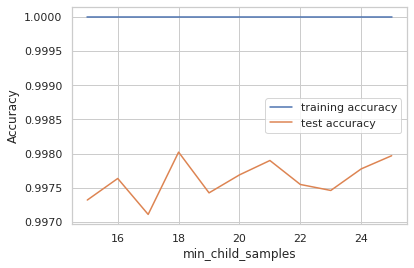

{'min_child_samples': 18}

In [116]:
# GridSearchCV to find optimal min_child_samples

lgb = LGBMClassifier(num_leaves = 70, max_depth = 29, learning_rate = 0.5, n_estimators = 600,
                     objective = 'binary', n_jobs = -1, random_state = 100)

parameter = 'min_child_samples'

param_grid = {parameter: range(15, 26)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lgb)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   2 out of  20 | elapsed:    3.4s remaining:   30.7s
[Parallel(n_jobs=15)]: Done  13 out of  20 | elapsed:    8.3s remaining:    4.5s
[Parallel(n_jobs=15)]: Done  20 out of  20 | elapsed:    8.4s finished


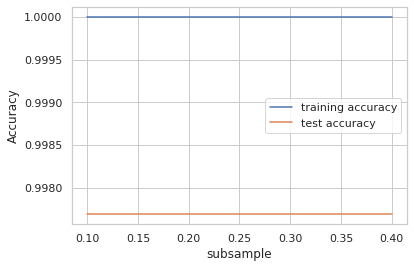

{'subsample': 0.1}

In [117]:
# GridSearchCV to find optimal subsample: 

lgb = LGBMClassifier(num_leaves = 70, max_depth = 29, learning_rate = 0.5, n_estimators = 600, min_child_samples = 20,
                     objective = 'binary', n_jobs = -1, random_state = 100)

parameter = 'subsample'

param_grid = {parameter: np.arange(0.1, 0.5, 0.1)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lgb)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   2 out of  20 | elapsed:    0.9s remaining:    7.8s
[Parallel(n_jobs=15)]: Done  13 out of  20 | elapsed:    3.3s remaining:    1.8s
[Parallel(n_jobs=15)]: Done  20 out of  20 | elapsed:    3.5s finished


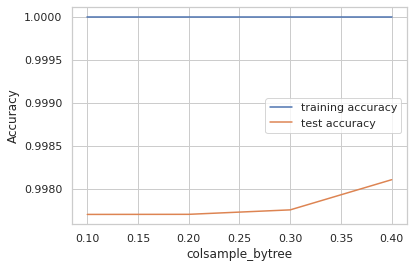

{'colsample_bytree': 0.4}

In [119]:
# GridSearchCV to find optimal colsample_bytree: 

lgb = LGBMClassifier(num_leaves = 70, max_depth = 29, learning_rate = 0.5, n_estimators = 600, min_child_samples = 20,
                     subsample = 0.1, objective = 'binary', n_jobs = -1, random_state = 100)

parameter = 'colsample_bytree'

param_grid = {parameter: np.arange(0.1, 0.5, 0.1)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lgb)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

In [120]:
# LightGBM with best parameters obtained from grid search

lgb = LGBMClassifier(num_leaves = 70, max_depth = 29, learning_rate = 0.5, n_estimators = 600, min_child_samples = 20,
                     subsample = 0.1, colsample_bytree = 1, objective = 'binary', n_jobs = -1, random_state = 100)

lgb = lgb.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, lgb, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'confusion_matrix'])
sampling_results

,f1,precision,recall,accuracy,confusion_matrix
0,0.416667,0.319149,0.6,0.881356,"[[297, 32], [10, 15]]"


In [124]:
# Sampling through RandomOverSampler
sampling = RandomOverSampler(random_state = 100)
X_train_resampled, y_train_resampled = sampling.fit_sample(X_train.values, y_train.values.ravel())

# Shuffle the data
perms = np.random.permutation(X_train_resampled.shape[0])
X_train_resampled = X_train_resampled[perms]
y_train_resampled = y_train_resampled[perms]

X_train_resampled = pd.DataFrame(data = X_train_resampled)
y_train_resampled = pd.DataFrame(data = y_train_resampled)

print(X_train_resampled.shape)
print(y_train_resampled.shape)

(1518, 71)
(1518, 1)


In [125]:
# Running LightGBM with RandomOverSampler Technique to get the final model scores.

lgb = LGBMClassifier(num_leaves = 70, max_depth = 29, learning_rate = 0.5, n_estimators = 600, min_child_samples = 20,
                     subsample = 0.1, colsample_bytree = 1, objective = 'binary', n_jobs = -1, random_state = 100)

lgb = lgb.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, lgb, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'confusion_matrix'])
sampling_results

,f1,precision,recall,accuracy,confusion_matrix
0,0.390244,0.5,0.32,0.929379,"[[321, 8], [17, 8]]"


In [126]:
feature_importances = pd.DataFrame(lgb.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
arpu_action_phase,115
max_rech_amt_action_phase,110
aon,105
onnet_mou_good_phase,103
total_ic_mou_action_phase,78
total_ic_mou_good_phase,74
total_rech_amt_action_phase,74
loc_ic_mou_action_phase,72
total_og_mou_action_phase,69
offnet_mou_good_phase,68


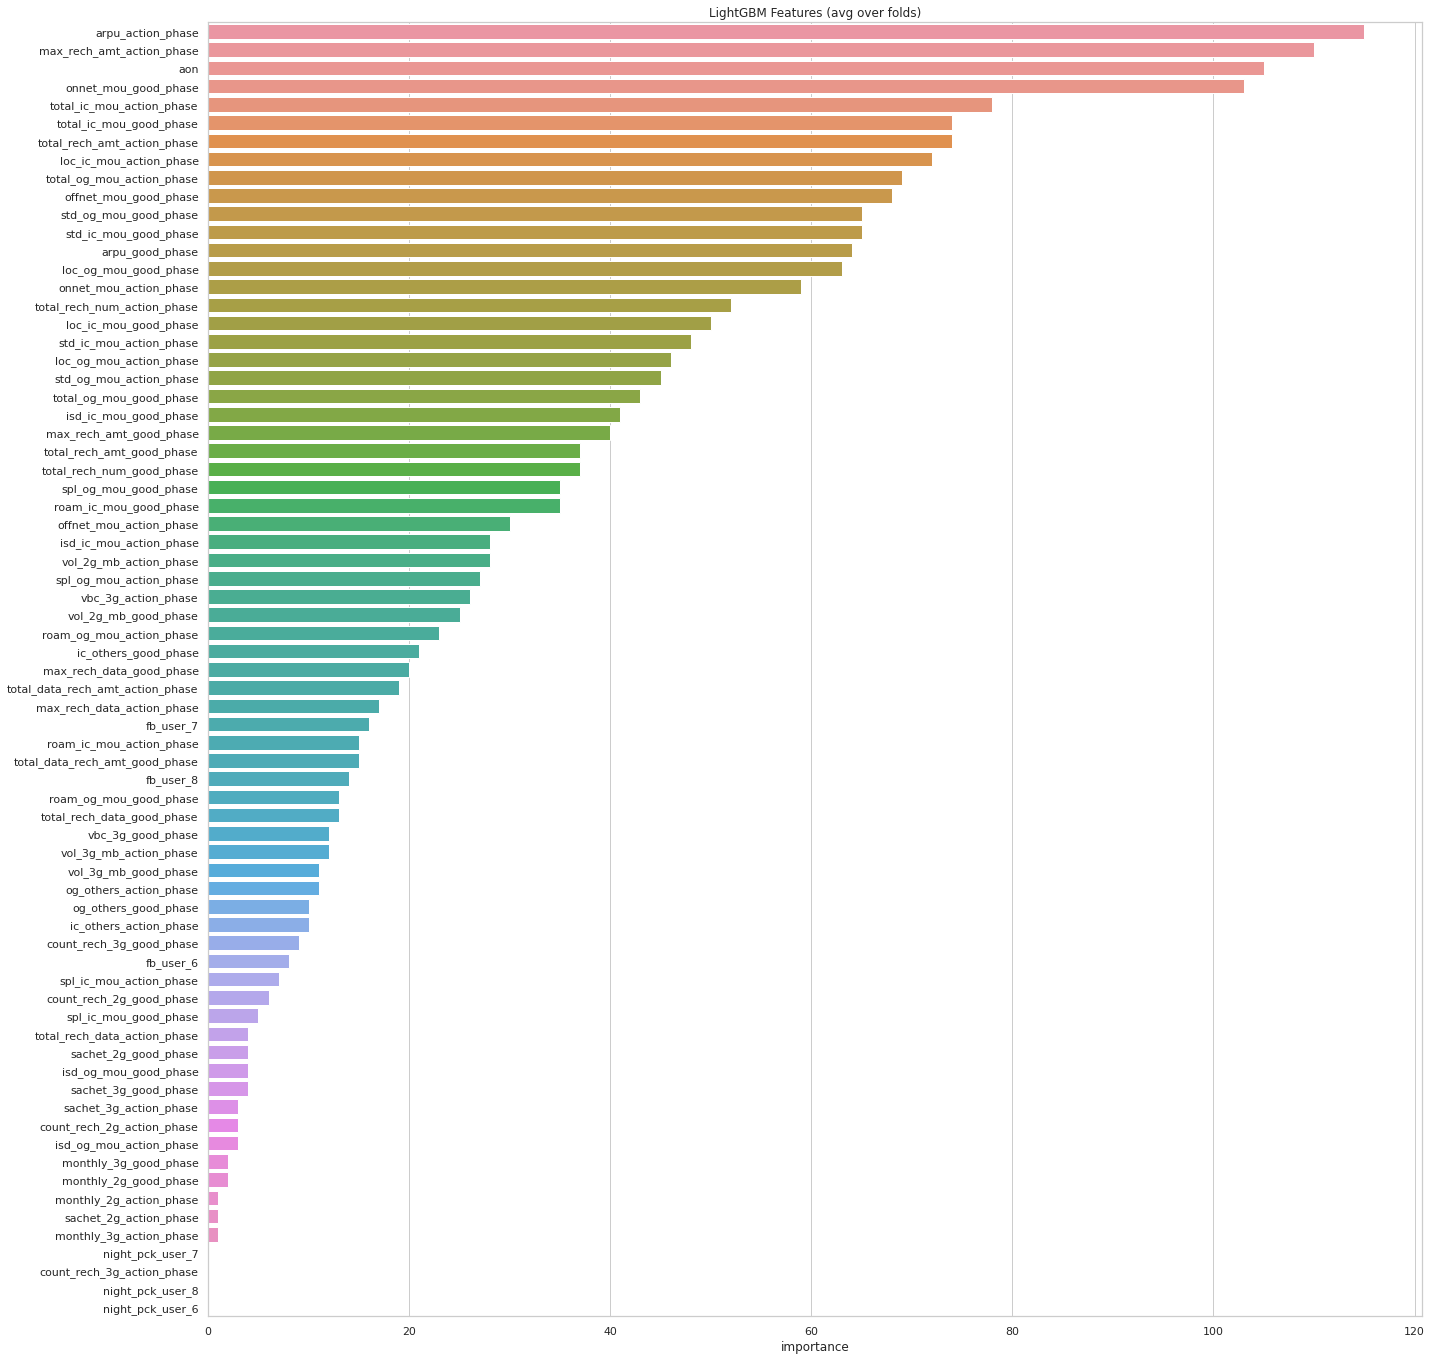

In [127]:
# Plotting the features
plt.figure(figsize=(20, 19))

sns.barplot(x = "importance",
            y = feature_importances.index,
            data = feature_importances.sort_values(by = "importance", ascending = False))

plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

# <font color = green>Final Inference</font>

To predict and analyse if a customer will churn or not we built 2 predictive models as mentioned below -  

1. Logistic Regression Model(With and without PCA).
2. Support Vector Machine.

The above models were initially created with default parameters which did not give good results hence we built boosting models which are as follows:

1. AdaBoostClassifier.
2. Light Gradient Boosting Machine with LightGBM.

The above boosting models were initially created with default parameters which performed better than any of the logistic regression model and SVM. The classification scores and metrics shoot up very high after we did some tuning.

Out of all the above models, **Light Gradient Boosting Machine with LightGBM**  produce best accuracy and it can be selected to predict churn data for future dataset or production.


Top 7 Features affecting churn

- aon	
- loc_ic_mou_action_phase	
-  arpu_action_phase	
- std_ic_mou_action_phase	
- max_rech_amt_action_phase	
- loc_ic_mou_good_phase	
- total_ic_mou_good_phase	






# <font color = green>Business Actions</font>

1. Less number of **high value customer** are churing but for last **6 month** no new high valued cusotmer is onboarded which is concerning and company should concentrate on that aspect.

2. Customers with less than 4 years of tenure are more likely to churn and company should concentrate more on that segment by rolling out new schems to that group.

3. Average revenue per user seems to be most important feature in determining churn prediction.

4. Incoming and Outgoing Calls on romaing for 8th month are strong indicators of churn behaviour

5. Local Outgoing calls made to landline , fixedline , mobile and call center provides a strong indicator of churn behaviour.

6. Better 2G/3G area coverage where 2G/3G services are not good, it's strong indicator of churn behaviour.